# **Ensemble Methods from scratch**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
plt.style.use('ggplot')


# **Bagging**

## **Linear Regression Model**

In [2]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs # Number of iterations
        self.weights = None # Weights
        self.bias = None # Bias
        self.cost = None # Cost function

    def fit(self, X, y, X_val, y_val, epochs=100):
        X = np.insert(X, 0, 1, axis=1) # Inserting 1 in the first column for bias
        self.weights = np.zeros(X.shape[1]) # Initializing weights to 0
        self.cost = np.zeros(self.epochs) # Initializing cost function to 0
        for i in tqdm(range(self.epochs)):
            self.weights = self.weights - (self.lr / len(X)) * np.sum((np.dot(X, self.weights) - y) * X.T, axis=1)
            self.cost[i] = self.cost_function(X, y, self.weights)

    def cost_function(self, X, y, weights):
        return np.sum(np.square(np.dot(X, weights) - y)) / (2 * len(X))

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)

        return np.dot(X, self.weights)
    
    def plot_cost(self):
        plt.plot(np.arange(self.epochs), self.cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost vs Epochs')
        plt.show()

    def mse(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

## **Logistic Regression**

In [3]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(X.shape[1])
        self.cost = np.zeros(self.epochs)
        for i in tqdm(range(self.epochs)):
            self.weights = self.weights - (self.lr / len(X)) * np.sum((self.sigmoid(np.dot(X, self.weights)) - y) * X.T, axis=1)
            self.cost[i] = self.cost_function(X, y, self.weights)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y, weights):
        return np.sum(-y * np.log(self.sigmoid(np.dot(X, weights))) - (1 - y) * np.log(1 - self.sigmoid(np.dot(X, weights)))) / len(X)
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)

        return np.round(self.sigmoid(np.dot(X, self.weights)))
    
    def plot_cost(self):
        plt.plot(np.arange(self.epochs), self.cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost vs Epochs')
        plt.show()

    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

## **Multinomial Logistic Regression Model**

In [4]:
class MultinomialLogisticRegression:
    def __init__(self, X_train, y_train, X_val, y_val, num_classes, learning_rate=0.01, epochs=3000):
      self.X_train = X_train
      self.X_val = X_val
      self.y_train = y_train
      self.y_val = y_val
      self.num_classes = num_classes
      self.num_features = X_train.shape[1]
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.weights = np.random.rand(self.num_features, self.num_classes)
      self.bias = np.zeros((1, self.num_classes))
      self.train_loss = []
      self.val_acc = []
      self.train_acc = []
      self.val_loss = []

    def softmax(self, logits):
      exp_x = np.exp(logits - np.max(logits, axis=1, keepdims=True))
      return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, probabs):
      # print("Shape of y_true:", y_true.shape)
      # print("Shape of probabs:", probabs.shape)
      new_probabs = probabs + 1e-5
      return -np.sum(y_true * np.log(probabs))/self.X_train.shape[0]

    # def accuracy(self, y_pred, y_true):
    #   y_true_labels = np.argmax(y_true)
    #   correct_predictions = np.sum(y_pred == y_true_labels)
    #   total_samples = len(y_true)
    #   accuracy = correct_predictions / total_samples
    #   return accuracy

    def fit(self, X_train, y_train, X_val, y_val, epochs=1000):
      
      for i in tqdm(range(self.epochs)):
        logits = np.dot(self.X_train, self.weights) + self.bias
        # print("Shape of X train:", self.X_train.shape)
        # print("Shape of weights:", self.weights.shape)
        # print("Shape of bias:", self.bias.shape)
        # print("Shape of logits:", logits.shape)
        probabs = self.softmax(logits)
        # print("Shape of probabs:", probabs.shape)
        y_pred_train = np.argmax(probabs, axis=1)
        # print("Shape of y_pred_train:", y_pred_train.shape)

        y_train = np.argmax(self.y_train, axis = 1)
        accuracy = accuracy_score(y_train, y_pred_train)
        self.train_acc.append(accuracy)

        train_loss = self.cross_entropy_loss(self.y_train, probabs)
        self.train_loss.append(train_loss)

        # Doing for validation set
        logits_val = np.dot(self.X_val, self.weights) + self.bias
        probabs_val = self.softmax(logits_val)
        y_pred_val = np.argmax(probabs_val, axis=1)

        y_val = np.argmax(self.y_val, axis = 1)
        val_accuracy = accuracy_score(y_val, y_pred_val)
        val_loss = self.cross_entropy_loss(self.y_val, probabs_val)
        self.val_loss.append(val_loss)
        self.val_acc.append(val_accuracy)

        gradient_weights = np.dot(self.X_train.T, (probabs - self.y_train)) / self.X_train.shape[0]
        gradient_bias = np.sum(probabs - self.y_train, axis=0) / self.X_train.shape[0]

        # Update weights and bias
        self.weights -= self.learning_rate * gradient_weights
        self.bias -= self.learning_rate * gradient_bias

    
        

    def predict(self, X_test):
        logits = np.dot(X_test, self.weights) + self.bias
        probabs = self.softmax(logits)
        # print("Shape of probabs(TEST):", probabs.shape)
        # return np.argmax(probabs, axis=1)
        return probabs

    def get_acc_loss(self):
      return self.train_acc, self.train_loss, self.val_acc

## **MLP Classification Model**

In [29]:
class MLPClassifier:
     
    def __init__(self, input_size, output_size, hidden_layers, hidden_neurons, activation='relu', learning_rate=0.01, optimizer='sgd'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.hidden_neurons = hidden_neurons
        self.learning_rate = learning_rate
        self.activation = activation
        self.optimizer = optimizer
        self.loss_history = []
        self.val_loss_history = []
        self.train_accuracy_history = []
        self.val_accuracy_history = []

        # Initialize weights and biases
        self.weights, self.biases = self.initialize_weights()

    def initialize_weights(self):
        layer_sizes = [self.input_size] + self.hidden_neurons + [self.output_size]
        weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

        return weights, biases

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)
    
    def compute_loss(self, y, output):
        m = y.shape[0]
        loss = -np.sum(y * np.log(output)) / m
        return loss

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'tanh':
            return self.tanh(x)
        elif self.activation == 'relu':
            return self.relu(x)

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - np.power(x, 2)
        elif self.activation == 'relu':
            return 1 * (x > 0)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward_propagation(self, X):
        self.layer_outputs = []
        z = X
        self.layer_outputs.append(z)

        # Forward propagate through hidden layers
        for i in range(self.hidden_layers):
            # ic(self.weights[i].shape, self.biases[i].shape)
            z = np.dot(z, self.weights[i]) + self.biases[i]
            a = self.activation_function(z)
            self.layer_outputs.append(a)

        # Output layer
        z = np.dot(z, self.weights[-1]) + self.biases[-1]
        a = self.softmax(z)
        self.layer_outputs.append(a)

        return a

    def backward_propagation(self, X, y, output):
        m = X.shape[0]
        deltas = [output - y]
        dWs = []
        dbias = []

        # Backpropagate through output layer and hidden layers
        for i in range(self.hidden_layers, 0, -1):
            # print("delta: ", deltas[0].shape)
            # print("weights: ", self.weights[i-1].shape)
            # print("layer_outputs: ", self.layer_outputs[i].shape)
            delta = np.dot(deltas[0], self.weights[i].T) * self.activation_derivative(self.layer_outputs[i])
            dW = (self.layer_outputs[i - 1].T).dot(delta)
            db = np.sum(delta, axis=0, keepdims=True)
            deltas.insert(0, delta)
            dWs.insert(0, dW)
            dbias.insert(0, db)

        # Check that the length of dWs is the same as the length of self.weights
        # assert len(dWs) == len(self.weights)
        # print("dWs: ", len(dWs))
        # print("weights: ", len(self.weights))

        # Update weights and biases
        for i in range(len(self.weights)-1):
            # print(i)
            self.weights[i] -= self.learning_rate * (dWs[i] / m)
            self.biases[i] -= self.learning_rate * (dbias[i] / m)

    def fit(self, X_train, y_train, X_val, y_val, epochs=9000):
       
        if self.optimizer == 'sgd':
            self.train_sgd(X_train, y_train, X_val, y_val, epochs)
        elif self.optimizer == 'batch':
            self.train_batch(X_train, y_train, X_val, y_val, epochs)
        elif self.optimizer == 'mini-batch':
            self.train_mini_batch(X_train, y_train, X_val, y_val, epochs)


    def train_batch(self, X, y, X_val, y_val, epochs=100):
        
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            loss = self.compute_loss(y, output)
            self.backward_propagation(X, y, output)

            val_output = self.forward_propagation(X_val)
            val_loss = self.compute_loss(y_val, val_output)

            train_accuracy = self.compute_accuracy(y, output)
            val_accuracy = self.compute_accuracy(y_val, val_output)

            self.train_accuracy_history.append(train_accuracy)
            self.val_accuracy_history.append(val_accuracy)

            self.val_loss_history.append(val_loss)
            self.loss_history.append(loss)
            

    def train_mini_batch(self, X, y, X_val, y_val, batch_size=32, epochs=100):
        
        for epoch in range(epochs):
            tot_loss = 0
            tot_val_loss = 0
            tot_acc = 0
            tot_val_acc = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output = self.forward_propagation(X_batch)
                loss = self.compute_loss(y_batch, output)
                tot_loss += loss
                tot_acc += self.compute_accuracy(y_batch, output)
                self.backward_propagation(X_batch, y_batch, output)

            for i in range(0, X_val.shape[0], batch_size):
                X_batch = X_val[i:i + batch_size]
                y_batch = y_val[i:i + batch_size]
                output = self.forward_propagation(X_batch)
                loss = self.compute_loss(y_batch, output)
                tot_val_loss += loss
                tot_val_acc += self.compute_accuracy(y_batch, output)

            avg_acc = tot_acc / (X.shape[0] / batch_size)
            avg_val_acc = tot_val_acc / (X_val.shape[0]/batch_size)
            avg_loss = tot_loss / (X.shape[0] / batch_size)
            avg_val_loss = tot_val_loss / (X_val.shape[0]/batch_size)
            self.val_loss_history.append(avg_val_loss)
            self.loss_history.append(avg_loss)
            self.train_accuracy_history.append(avg_acc)
            self.val_accuracy_history.append(avg_val_acc)   
            

    def train_sgd(self, X, y, X_val, y_val, epochs=100):
        
        for epoch in range(epochs):
            total_loss = 0
            total_val_loss = 0
            total_acc = 0
            total_val_acc = 0
            for i in range(X.shape[0]):
                random_index = np.random.randint(0, X.shape[0])
                X_sample = X[random_index, :].reshape(1, -1)
                y_sample = y[random_index, :].reshape(1, -1)
                output = self.forward_propagation(X_sample)
                loss = self.compute_loss(y_sample, output)
                total_loss += loss
                total_acc += self.compute_accuracy(y_sample, output)
                self.backward_propagation(X_sample, y_sample, output)

            for i in range(X_val.shape[0]):
                random_index = np.random.randint(0, X_val.shape[0])
                X_sample = X_val[random_index, :].reshape(1, -1)
                y_sample = y_val[random_index, :].reshape(1, -1)
                output = self.forward_propagation(X_sample)
                loss = self.compute_loss(y_sample, output)
                total_val_loss += loss
                total_val_acc += self.compute_accuracy(y_sample, output)

            avg_acc = total_acc / X.shape[0]
            avg_val_acc = total_val_acc / X_val.shape[0]
            avg_loss = total_loss / X.shape[0]
            avg_val_loss = total_val_loss / X_val.shape[0]
            self.loss_history.append(avg_loss)
            self.val_loss_history.append(avg_val_loss)
            self.train_accuracy_history.append(avg_acc)
            self.val_accuracy_history.append(avg_val_acc)
            


    def compute_accuracy(self, y_true, y_pred):
        y_true = np.argmax(y_true, axis=1)
        y_pred = np.argmax(y_pred, axis=1)
        return np.mean(y_true == y_pred)

    def predict(self, X):
        output = self.forward_propagation(X)
        # return np.argmax(output, axis=1)
        return output
    
    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label='training loss')
        plt.plot(range(len(self.val_loss_history)), self.val_loss_history, label='validation loss')
        plt.title('Loss Over Epochs')
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

    def plot_accuracy(self):
        plt.plot(range(len(self.train_accuracy_history)), self.train_accuracy_history, label='training accuracy')
        plt.plot(range(len(self.val_accuracy_history)), self.val_accuracy_history, label='validation accuracy')
        plt.title('Accuracy Over Epochs')
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()

In [31]:
mlp = MLPClassifier(X_train.shape[1], 6, 1, [32], activation='relu', learning_rate=0.01, optimizer='batch')
mlp.fit(X_train, y_train, X_val, y_val, epochs=1000)
y_pred = mlp.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_test, y_pred)

In [32]:
acc

0.5565217391304348

## **MLP Regression Model**


In [35]:
class MLPRegressor:
    def __init__(self, input_size, output_size, hidden_layers, hidden_neurons, activation='relu', learning_rate=0.01, optimizer='sgd'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.hidden_neurons = hidden_neurons
        self.learning_rate = learning_rate
        self.activation = activation
        self.optimizer = optimizer
        self.loss_history = []
        self.val_loss_history = []

        # Initialize weights and biases
        self.weights, self.biases = self.initialize_weights()

    def initialize_weights(self):
        layer_sizes = [self.input_size] + self.hidden_neurons + [self.output_size]
        weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

        return weights, biases

    def linear(self, x):
        return x

    def relu(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)

    def compute_loss(self, y, output):
        m = y.shape[0]
        loss = np.mean((output - y) ** 2)
        return loss

    def activation_function(self, x):
        if self.activation == 'relu':
            return self.relu(x)
        elif self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'tanh':
            return self.tanh(x)

    def activation_derivative(self, x):
        if self.activation == 'relu':
            return (x > 0).astype(float)
        elif self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - np.power(x, 2)

    def forward_propagation(self, X):
        self.layer_outputs = []
        z = X
        self.layer_outputs.append(z)

        # Forward propagate through hidden layers
        for i in range(self.hidden_layers):
            z = np.dot(z, self.weights[i]) + self.biases[i]
            a = self.activation_function(z)
            self.layer_outputs.append(a)

        # Output layer
        z = np.dot(z, self.weights[-1]) + self.biases[-1]
        a = self.linear(z)  # Linear activation for regression
        self.layer_outputs.append(a)
        # print("a shape",a.shape)

        return a

    def backward_propagation(self, X, y, output):
        m = X.shape[0]
        
        y = y.reshape(-1,1)
        # print("y shape",y.shape)
        deltas = [output - y]
        dWs = []
        dbias = []

        # Backpropagate through output layer and hidden layers
        for i in range(self.hidden_layers, 0, -1):
            
            delta = np.dot(deltas[0], self.weights[i].T) * self.activation_derivative(self.layer_outputs[i])
            dW = (self.layer_outputs[i - 1].T).dot(delta)
            db = np.sum(delta, axis=0, keepdims=True)
            deltas.insert(0, delta)
            dWs.insert(0, dW)
            dbias.insert(0, db)

        # Update weights and biases
        for i in range(len(self.weights) - 1):
            self.weights[i] -= self.learning_rate * (dWs[i] / m)
            self.biases[i] -= self.learning_rate * (dbias[i] / m)

    def fit(self, X, y, X_val, y_val, epochs=9000):
        if self.optimizer == 'sgd':
            self.train_sgd(X, y, X_val, y_val, epochs)
        elif self.optimizer == 'batch':
            self.train_batch(X, y, X_val, y_val, epochs)
        elif self.optimizer == 'mini-batch':
            self.train_mini_batch(X, y, X_val, y_val, epochs)

    def train_batch(self, X, y, X_val, y_val, epochs=100):
        
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            loss = self.compute_loss(y, output)
            self.loss_history.append(loss)
            self.backward_propagation(X, y, output)

        for epoch in range(epochs):
            output = self.forward_propagation(X_val)
            loss = self.compute_loss(y_val, output)
            self.val_loss_history.append(loss)
            

    def train_mini_batch(self, X, y, X_val, y_val, batch_size=32, epochs=100):
        
        for epoch in range(epochs):
            tot_loss = 0
            tot_val_loss = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output = self.forward_propagation(X_batch)
                self.backward_propagation(X_batch, y_batch, output)
                loss = self.compute_loss(y_batch, output)
                tot_loss += loss
                


            for i in range(0, X_val.shape[0], batch_size):
                X_batch = X_val[i:i + batch_size]
                y_batch = y_val[i:i + batch_size]
                output = self.forward_propagation(X_batch)
                loss = self.compute_loss(y_batch, output)
                tot_val_loss += loss

            avg_val_loss = tot_val_loss / (X_val.shape[0] / batch_size)
            avg_loss = tot_loss / (X.shape[0] / batch_size)
            self.loss_history.append(avg_loss)
            self.val_loss_history.append(avg_val_loss)
            

    def train_sgd(self, X, y, X_val, y_val, epochs=100):
        
        for epoch in range(epochs):
            total_loss = 0
            total_val_loss = 0
            for i in range(X.shape[0]):
                random_index = np.random.randint(0, X.shape[0])
                X_sample = X[random_index, :].reshape(1, -1)
                y_sample = y[random_index].reshape(1, -1)
                output = self.forward_propagation(X_sample)
                self.backward_propagation(X_sample, y_sample, output)
                loss = self.compute_loss(y_sample, output)
                total_loss += loss
                

            for i in range(X_val.shape[0]):
                random_index = np.random.randint(0, X_val.shape[0])
                X_sample = X_val[random_index, :].reshape(1, -1)
                y_sample = y_val[random_index].reshape(1, -1)
                output = self.forward_propagation(X_sample)
                loss = self.compute_loss(y_sample, output)
                total_val_loss += loss

            avg_val_loss = total_val_loss / X_val.shape[0]
            avg_loss = total_loss / X.shape[0]
            self.loss_history.append(avg_loss)
            self.val_loss_history.append(avg_val_loss)
            

    def predict(self, X):
        output = self.forward_propagation(X)
        return output

    def calculate_mse(self, actual_values, predicted_values):
        n = len(actual_values)
        squared_errors = (actual_values - predicted_values) ** 2
        mse = np.sum(squared_errors) / n
        return mse

    def calculate_rmse(self, actual_values, predicted_values):
        mse = self.calculate_mse(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        return rmse

    def calculate_r_squared(self, actual_values, predicted_values):
        n = len(actual_values)
        mean_actual = np.mean(actual_values)
        total_sum_of_squares = np.sum((actual_values - mean_actual) ** 2)
        residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)
        r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
        return r2

    def get_metrics(self, actual_values, predicted_values):
        mse = self.calculate_mse(actual_values, predicted_values)
        rmse = self.calculate_rmse(actual_values, predicted_values)
        r2 = self.calculate_r_squared(actual_values, predicted_values)
        print("MSE: ", mse)
        print("RMSE: ", rmse)
        print("R2: ", r2)

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label='training loss')
        plt.plot(range(len(self.val_loss_history)), self.val_loss_history, label='validation loss')
        plt.legend()
        plt.title('Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

## **Decision Tree Classifier Model**

In [7]:
class DecisionTree:
    def __init__(self, criterion = 'gini',max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = DecisionTreeClassifier(criterion = self.criterion, max_depth = self.max_depth)
    
    def fit(self, X, y, X_val, y_val, epochs=100):
        self.tree.fit(X, y)

    def predict(self, X):
        y_pred = self.tree.predict(X)
        # return np.argmax(y_pred, axis = 1)
        return y_pred
    
    def get_impurity(self):
        return self.tree.tree_.impurity[0]

## **Decision Tree Regressor Model**

In [50]:
class DecisionTreeReg:
    def __init__(self, criterion = 'squared_error',max_depth=25):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = DecisionTreeRegressor(criterion = self.criterion, max_depth = self.max_depth)
    
    def fit(self, X, y, X_val, y_val, epochs=100):
        self.tree.fit(X, y)

    def predict(self, X):
        y_pred = self.tree.predict(X)
        # return np.argmax(y_pred, axis = 1)
        return y_pred
    
    def get_impurity(self):
        return self.tree.tree_.impurity[0]
    
    def get_node_indices(self, X):
        return self.tree.apply(X)

In [9]:
df_reg = pd.read_csv('HousingData.csv')
df_reg.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [10]:
df_reg.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
df_reg = df_reg.fillna(df_reg.mean())

In [12]:
df_reg.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
#Standardize the data using sklearn StandardScaler
scaler = StandardScaler()

In [14]:
# STandardizing the features
X_reg = df_reg.iloc[:, :-1].values
X_reg = scaler.fit_transform(X_reg)
y_reg = df_reg.iloc[:, -1].values
y_reg = scaler.fit_transform(y_reg.reshape(-1,1))
y_reg = y_reg.reshape(-1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=42)

In [358]:
# #fit transform y_reg keeping in mind that y_reg is a 1D array and not reshaping
# y_reg = scaler.fit_transform(y_reg.reshape(-1,1))
# y_reg = y_reg.reshape(-1)
y_reg.shape

(506,)

In [15]:
X_train_reg[0], y_train_reg[0]

(array([-0.42147573,  2.7857008 , -1.05849049, -0.27985132, -1.24992368,
        -0.56506862, -0.76310594,  1.67551331, -0.75292215,  0.36088773,
         1.22270208,  0.44105193,  0.29754862]),
 18.9)

In [15]:
#Best hyperparameters for Linear Regression
lrs = [0.0001, 0.001, 0.01, 0.1]
epochs = [100, 1000, 5000,10000]

mse_lowest = 9999

for lr in lrs:
    for epoch in epochs:
        model = LinearRegression(lr=lr, epochs=epoch)
        model.fit(X_train_reg, y_train_reg, X_val_reg, y_val_reg, epochs=epoch)
        y_pred_reg = model.predict(X_test_reg)
        # print(y_pred_reg)
        # print(y_test_reg)
        mse = model.mse(y_test_reg, y_pred_reg)
        if mse < mse_lowest:
            mse_lowest = mse
            best_lr = lr
            best_epoch = epoch

print('Best hyperparameters for Linear Regression')
print('Learning Rate:', best_lr)
print('Epochs:', best_epoch)


100%|██████████| 10000/10000 [00:00<00:00, 14769.19it/s]

Best hyperparameters for Linear Regression
Learning Rate: 0.1
Epochs: 5000


In [16]:
df_cla = pd.read_csv('WineQT.csv')
df_cla.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [17]:
df_cla = df_cla.drop(['Id'], axis=1)

In [18]:
df_cla['quality'] = df_cla['quality'] - 3

In [19]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(df_cla[['quality']])

c:\Users\Ishan\Desktop\Ishan\IIITH\3-1\SMAI\Assignments\Assignment - 4\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
scaler = StandardScaler()
# X is all the columns except 'quality'
X = df_cla.drop(['quality'], axis=1)
X = X.values
X = scaler.fit_transform(X)

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
import copy

In [464]:
class Bagging:
    def __init__(self, base_model, num_estimators, frac, task, bootstrap = True, voting  = 'hard'):
        self.base_models = base_model
        self.num_estimators = num_estimators
        self.frac = frac
        self.bootstrap = bootstrap
        self.voting = voting
        self.task = task
        self.accuracy = []
        # self.weights = np.array([0.2]*self.num_estimators+[0.3]*self.num_estimators+[0.5]*self.num_estimators) 

    def fit(self, X, y):
        self.trained_models = []
        for model in self.base_models:
            #Get copy of model
            model = copy.deepcopy(model)
            for num in range(self.num_estimators):
                if self.bootstrap == True:
                    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1-self.frac, random_state=num)
                    model.fit(X_train, y_train, X_val, y_val, epochs=100)
                    self.trained_models.append(model)
                    print("Training for a model complete")
                else:
                    num_per_model = len(X) // self.num_estimators
                    # each of the model should have num_per_model samples and train on it
                    X_train = X[num*num_per_model:(num+1)*num_per_model]
                    y_train = y[num*num_per_model:(num+1)*num_per_model]
                    #Create dummy validation set
                    X_val = X[(num+1)*num_per_model:(num+2)*num_per_model]
                    y_val = y[(num+1)*num_per_model:(num+2)*num_per_model]
                    model.fit(X_train, y_train, X_val, y_val, epochs=100)
                    self.trained_models.append(model)
                    print("Training for a model complete")

                
    def validation(self, X_val, y_val):
        #use self.trained_models to predict on X_val and y_val. Depending on the accuracy of each model, assign weights to each model in self.weights
        # print("X_val shape:", X_val.shape)
        # print("y_val shape:", y_val.shape)
        if self.task == 'classification':
            y_val = np.argmax(y_val, axis=1)
            for model in self.trained_models:
                pred = model.predict(X_val)
                pred_cla = np.argmax(pred, axis=1)
                acc = accuracy_score(y_val, pred_cla)
                self.accuracy.append(acc)

            total_acc = sum(self.accuracy)
            self.weights = np.array([acc / total_acc for acc in self.accuracy])
            # print("Type of weights", type(self.weights))
            # print("Weights:", self.weights)
        if self.task == 'regression':
            for model in self.trained_models:
                pred = model.predict(X_val)
                acc = mean_squared_error(y_val, pred)
                self.accuracy.append(acc)

            total_acc = sum(self.accuracy)
            self.weights = np.array([acc / total_acc for acc in self.accuracy])
                

    def predict(self, X_test):
        if self.task == 'classification':
            predictions_classification = []
            predictions_regression = []
            for model in self.trained_models:
                pred = model.predict(X_test)
                # print(pred.shape)
                pred_cla = np.argmax(pred, axis=1)
                predictions_regression.append(pred)
                predictions_classification.append(pred_cla)
            predictions_classification = np.array(predictions_classification)
            predictions_regression = np.array(predictions_regression)

            # print(predictions.shape)
            if self.voting == 'hard':
                hard_votes = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions_classification)
                # The 'hard_votes' array now contains the majority vote for each sample
                # print(hard_votes)
                # print(hard_votes.shape)
                return hard_votes
            elif self.voting == 'soft':
                temp = predictions_regression * self.weights[:, np.newaxis, np.newaxis]
                sum = np.sum(temp, axis=0)
                soft_votes = np.argmax(sum, axis=1)
                return soft_votes
        elif self.task == 'regression':
            if self.voting == 'hard':
                predictions = []
                for model in self.trained_models:
                    pred = model.predict(X_test)
                    # print("Pred:",pred)
                    pred = pred.flatten()
                    # print("Pred flattened:",pred)
                    predictions.append(pred)
                    # print(pred.shape)
                predictions = np.array(predictions)
                # print(predictions.shape)
                # take mean for each column
                hard_votes = np.mean(predictions, axis=0)
                # hard_votes = np.mean(predictions, axis=1)
                return hard_votes
            elif self.voting == 'soft':
                predictions = []
                for model in self.trained_models:
                    pred = model.predict(X_test)
                    # print("Pred:",pred)
                    pred = pred.flatten()
                    # print("Pred flattened:",pred)
                    predictions.append(pred)
                    # print(pred.shape)
                predictions = np.array(predictions)
                pred_weighted = predictions * self.weights[:, np.newaxis]
                # take mean for each column
                soft_votes = np.mean(predictions, axis=0)
                return soft_votes



### Classification

In [357]:
#Base models
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]

In [136]:
bag = Bagging(base_models, 1, 0.5, 'classification', bootstrap=True)

In [137]:
bag.fit(X_train, y_train)

100%|██████████| 3000/3000 [00:03<00:00, 984.47it/s] 


Training for a model complete
Training for a model complete
Training for a model complete


In [138]:
y_pred = bag.predict(X_test)

In [139]:
y_pred

array([0, 4, 2, 3, 2, 4, 2, 3, 3, 2, 0, 1, 1, 3, 2, 2, 2, 2, 1, 2, 3, 3,
       2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 3, 0, 2, 3, 2, 3,
       3, 2, 4, 4, 2, 0, 0, 2, 0, 2, 1, 2, 2, 4, 0, 2, 2, 2, 3, 4, 2, 3,
       2, 2, 2, 4, 0, 2, 3, 3, 3, 2, 2, 2, 3, 0, 2, 2, 0, 2, 2, 0, 2, 3,
       1, 3, 2, 0, 4, 2, 1, 4, 3, 3, 3, 2, 0, 0, 0, 3, 2, 0, 3, 1, 3, 2,
       3, 3, 2, 0, 3], dtype=int64)

In [140]:

y_test

array([4, 3, 2, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3,
       2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3,
       2, 2, 4, 4, 2, 2, 1, 4, 2, 3, 3, 2, 3, 5, 3, 3, 2, 1, 4, 4, 2, 3,
       2, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 4,
       3, 2, 2, 4, 4, 2, 2, 4, 3, 2, 4, 2, 2, 2, 3, 4, 2, 2, 4, 2, 3, 2,
       3, 3, 3, 2, 3], dtype=int64)

In [141]:
accuracy_score(y_test, y_pred)

0.4956521739130435

In [168]:
bag = Bagging(base_models, 1, 0.5, 'classification', bootstrap=True, voting='soft')

In [169]:
bag.fit(X_train, y_train)

100%|██████████| 3000/3000 [00:02<00:00, 1094.51it/s]

Training for a model complete
Training for a model complete
Training for a model complete


In [170]:
bag.validation(X_val, y_val)

In [171]:
y_pred_soft = bag.predict(X_test)

In [172]:
y_pred_soft

array([3, 4, 2, 4, 2, 4, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 4, 2, 3, 2, 3,
       3, 2, 4, 4, 2, 3, 3, 4, 1, 3, 1, 2, 2, 4, 3, 2, 2, 2, 3, 4, 2, 3,
       3, 2, 2, 4, 2, 2, 3, 4, 2, 2, 2, 2, 3, 5, 2, 2, 3, 3, 2, 3, 2, 2,
       3, 3, 2, 4, 4, 2, 2, 4, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2,
       4, 3, 3, 2, 3], dtype=int64)

In [173]:
y_test

array([4, 3, 2, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3,
       2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3,
       2, 2, 4, 4, 2, 2, 1, 4, 2, 3, 3, 2, 3, 5, 3, 3, 2, 1, 4, 4, 2, 3,
       2, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 4,
       3, 2, 2, 4, 4, 2, 2, 4, 3, 2, 4, 2, 2, 2, 3, 4, 2, 2, 4, 2, 3, 2,
       3, 3, 3, 2, 3], dtype=int64)

In [174]:
accuracy_score(y_test, y_pred_soft)

0.6086956521739131

In [361]:
bagging = Bagging(base_models, 1, 0.5, 'classification', bootstrap=False, voting='soft')

In [362]:
bagging.fit(X_train, y_train)

100%|██████████| 3000/3000 [00:02<00:00, 1094.63it/s]
C:\Users\Ishan\AppData\Local\Temp\ipykernel_14648\4258058711.py:37: RuntimeWarning: invalid value encountered in scalar divide
  loss = -np.sum(y * np.log(output)) / m
c:\Users\Ishan\Desktop\Ishan\IIITH\3-1\SMAI\Assignments\Assignment - 4\env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Ishan\Desktop\Ishan\IIITH\3-1\SMAI\Assignments\Assignment - 4\env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training for a model complete
Training for a model complete
Training for a model complete


In [363]:
bagging.validation(X_val, y_val)

In [364]:
y_pred = bagging.predict(X_test)

In [365]:
y_pred.shape, y_test.shape

((115,), (115, 6))

In [366]:
accuracy_score(np.argmax(y_test, axis = 1), y_pred)

0.6086956521739131

In [ ]:
# Iterate over different number of estimators 1 to 5, voting, bootstrap and plot the accuracy and training time

num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
accuracy = []
training_time = []
config = []

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            start = time.time()
            bag = Bagging(base_models, num, 0.5, 'classification', bootstrap=boot, voting=vote)
            bag.fit(X_train, y_train)
            bag.validation(X_val, y_val)
            y_pred = bag.predict(X_test)
            end = time.time()
            accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))
            training_time.append(end - start)
            config.append((num, vote, boot))

In [373]:
#Print config and corresponding accuracy and training time
for i in range(len(config)):
    print("Config:", config[i], " Accuracy: ", accuracy[i], " Training time: ", training_time[i])

Config: (1, 'hard', True)  Accuracy:  0.46956521739130436  Training time:  4.350160837173462
Config: (1, 'hard', False)  Accuracy:  0.591304347826087  Training time:  6.224802494049072
Config: (1, 'soft', True)  Accuracy:  0.5565217391304348  Training time:  5.118536710739136
Config: (1, 'soft', False)  Accuracy:  0.6086956521739131  Training time:  5.518927574157715
Config: (2, 'hard', True)  Accuracy:  0.5130434782608696  Training time:  9.342745542526245
Config: (2, 'hard', False)  Accuracy:  0.5217391304347826  Training time:  9.752007722854614
Config: (2, 'soft', True)  Accuracy:  0.6173913043478261  Training time:  9.351275444030762
Config: (2, 'soft', False)  Accuracy:  0.591304347826087  Training time:  9.536057710647583
Config: (3, 'hard', True)  Accuracy:  0.5739130434782609  Training time:  15.196295738220215
Config: (3, 'hard', False)  Accuracy:  0.5652173913043478  Training time:  14.242845058441162
Config: (3, 'soft', True)  Accuracy:  0.6173913043478261  Training time:  

Base model Multinomial Decision Tree

In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []
training_time = []
config = []
log_reg = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
base_models = [log_reg]

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, frac, 'classification', bootstrap=boot, voting=vote)
                bag.fit(X_train, y_train)
                bag.validation(X_val, y_val)
                y_pred = bag.predict(X_test)
                end = time.time()
                accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [ ]:
# Accuracy for different configurations and plot the heatmap for accuracy
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []
config = []
log_reg = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
base_models = [log_reg]

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'classification', bootstrap=True, voting='soft')
        bag.fit(X_train, y_train)
        bag.validation(X_val, y_val)
        y_pred = bag.predict(X_test)
        accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))
        config.append((num, frac))

In [ ]:
#plot heatmap of accuracy
accuracy = np.array(accuracy)
accuracy = accuracy.reshape(5, 5)

In [ ]:
#plot heatmap using sns
sns.heatmap(accuracy, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of Accuracy')
plt.show()

In [393]:
# create a pandas dataframe for the above results
df = pd.DataFrame({'Config': config, 'Accuracy': accuracy, 'Training Time': training_time})
df.head(25)

,Config,Accuracy,Training Time
0,"(1, hard, True, 0.15)",0.695652,3.918149
1,"(1, hard, True, 0.25)",0.695652,3.291476
2,"(1, hard, True, 0.5)",0.695652,3.812244
3,"(1, hard, True, 0.75)",0.695652,3.763351
4,"(1, hard, True, 0.9)",0.695652,3.745837
5,"(1, hard, False, 0.15)",0.695652,4.613518
6,"(1, hard, False, 0.25)",0.695652,4.399328
7,"(1, hard, False, 0.5)",0.695652,4.589410
8,"(1, hard, False, 0.75)",0.695652,4.401213
9,"(1, hard, False, 0.9)",0.695652,3.759406


The best performing model has the configuration num_estimator = 5, voting = hard, Bootstrap = True, frac = 0.25

In [451]:
log_reg = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
base_models = [log_reg]

#Train ensemble model
bag = Bagging(base_models, 5, 0.5, 'classification', bootstrap=True, voting='hard')
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis = 1), y_pred)

100%|██████████| 3000/3000 [00:04<00:00, 655.40it/s]


Training for a model complete


100%|██████████| 3000/3000 [00:03<00:00, 924.73it/s] 


Training for a model complete


100%|██████████| 3000/3000 [00:03<00:00, 791.51it/s]


Training for a model complete


100%|██████████| 3000/3000 [00:03<00:00, 830.00it/s] 


Training for a model complete


100%|██████████| 3000/3000 [00:03<00:00, 795.88it/s] 

Training for a model complete


In [453]:
#Get base model accuracy
log_reg.fit(X_train, y_train, X_val, y_val, epochs=100)
y_pred = log_reg.predict(X_test)
base_model_accuracy = accuracy_score(np.argmax(y_test, axis = 1),np.argmax(y_pred, axis = 1))


100%|██████████| 3000/3000 [00:05<00:00, 578.40it/s]


In [454]:
ensemble_accuracy, base_model_accuracy

(0.6521739130434783, 0.6347826086956522)

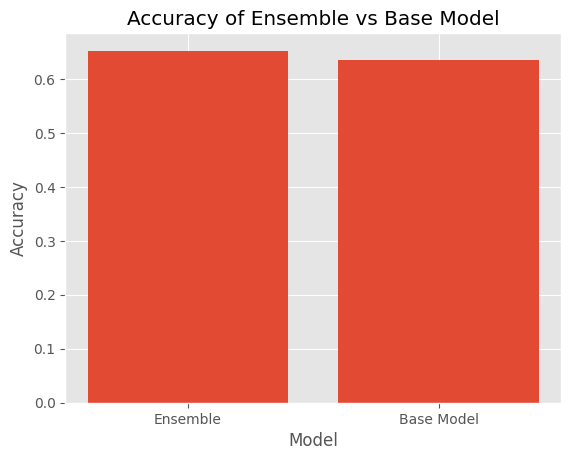

In [455]:
#Plot the bar graph using plotly
accuracy = [ensemble_accuracy, base_model_accuracy]
plt.bar(['Ensemble', 'Base Model'], accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble vs Base Model')
plt.show()

In [ ]:
log_reg = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
base_models = [log_reg]
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'classification', bootstrap=True, voting='soft')
        bag.fit(X_train, y_train)
        bag.validation(X_val, y_val)
        y_pred = bag.predict(X_test)
        accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))

#plot heatmap of accuracy
accuracy = np.array(accuracy)
accuracy = accuracy.reshape(5, 5)

#plot heatmap using sns
sns.heatmap(accuracy, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of Accuracy')
plt.show()


In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []
training_time = []
config = []
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
base_models = [mlp]

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, frac, 'classification', bootstrap=boot, voting=vote)
                bag.fit(X_train, y_train)
                bag.validation(X_val, y_val)
                y_pred = bag.predict(X_test)
                end = time.time()
                accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [460]:
df1 = pd.DataFrame({'Config': config, 'Accuracy': accuracy, 'Training Time': training_time})
df1.head(25)

,Config,Accuracy,Training Time
0,"(1, hard, True, 0.15)",0.373913,0.155025
1,"(1, hard, True, 0.25)",0.373913,0.113913
2,"(1, hard, True, 0.5)",0.365217,0.117649
3,"(1, hard, True, 0.75)",0.365217,0.082765
4,"(1, hard, True, 0.9)",0.365217,0.123697
5,"(1, hard, False, 0.15)",0.356522,0.101011
6,"(1, hard, False, 0.25)",0.356522,0.086221
7,"(1, hard, False, 0.5)",0.356522,0.299837
8,"(1, hard, False, 0.75)",0.356522,0.267789
9,"(1, hard, False, 0.9)",0.356522,0.250067


In [464]:
max_index = df1["Accuracy"].idxmax()

# Retrieve the corresponding row
row_with_max_accuracy = df1.loc[max_index]
row_with_max_accuracy

Config           (5, hard, False, 0.15)
Accuracy                       0.556522
Training Time                  0.337466
Name: 85, dtype: object

In [465]:
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
base_models = [mlp]

#Train ensemble model
bag = Bagging(base_models, 5, 0.15, 'classification', bootstrap=False, voting='hard')
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis = 1), y_pred)

#Get base model accuracy
mlp.fit(X_train, y_train, X_val, y_val, epochs=100)
y_pred = mlp.predict(X_test)
base_model_accuracy = accuracy_score(np.argmax(y_test, axis = 1),np.argmax(y_pred, axis = 1))


Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete


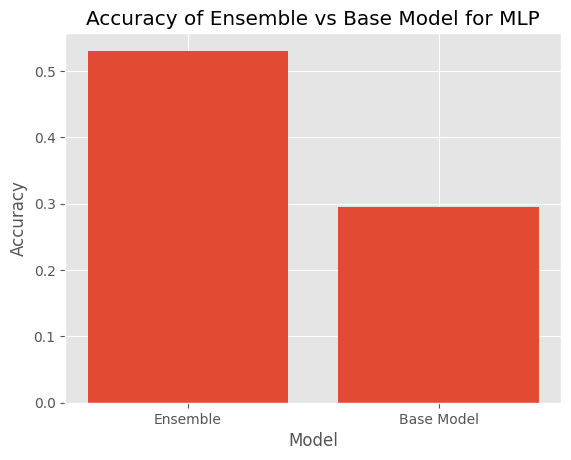

In [467]:
#Plot the bar graph 
accuracy = [ensemble_accuracy, base_model_accuracy]
plt.bar(['Ensemble', 'Base Model'], accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble vs Base Model for MLP')
plt.show()

In [ ]:
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
base_models = [mlp]
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'classification', bootstrap=True, voting='soft')
        bag.fit(X_train, y_train)
        bag.validation(X_val, y_val)
        y_pred = bag.predict(X_test)
        accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))

#plot heatmap of accuracy
accuracy = np.array(accuracy)
accuracy = accuracy.reshape(5, 5)

#plot heatmap using sns
sns.heatmap(accuracy, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of Accuracy for MLP')
plt.show()


In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []
training_time = []
config = []
dt = DecisionTree()
base_models = [dt]

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, frac, 'classification', bootstrap=boot, voting=vote)
                bag.fit(X_train, y_train)
                bag.validation(X_val, y_val)
                y_pred = bag.predict(X_test)
                end = time.time()
                accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [480]:
df2 = pd.DataFrame({'Config': config, 'Accuracy': accuracy, 'Training Time': training_time})
df2.head(5)

,Config,Accuracy,Training Time
0,"(1, hard, True, 0.15)",0.486957,0.014055
1,"(1, hard, True, 0.25)",0.452174,0.017537
2,"(1, hard, True, 0.5)",0.452174,0.021044
3,"(1, hard, True, 0.75)",0.539130,0.028575
4,"(1, hard, True, 0.9)",0.521739,0.039069


In [481]:
max_index = df2["Accuracy"].idxmax()

# Retrieve the corresponding row
row_with_max_accuracy = df2.loc[max_index]
row_with_max_accuracy

Config           (2, soft, True, 0.75)
Accuracy                      0.686957
Training Time                 0.046432
Name: 33, dtype: object

Best performing model is num_estimator = 2, voting = soft, bootstrap = True and frac = 0.75 

In [485]:
#Train ensemble model
dt = DecisionTree()
base_models = [dt]

bag = Bagging(base_models, 2, 0.75, 'classification', bootstrap=True, voting='soft')
bag.fit(X_train, y_train)
bag.validation(X_val, y_val)
y_pred = bag.predict(X_test)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis = 1), y_pred)

#Get base model accuracy
dt.fit(X_train, y_train, X_val, y_val, epochs=100)
y_pred = dt.predict(X_test)
base_model_accuracy = accuracy_score(np.argmax(y_test, axis = 1),np.argmax(y_pred, axis = 1))

Training for a model complete
Training for a model complete


In [486]:
ensemble_accuracy, base_model_accuracy

(0.6695652173913044, 0.6086956521739131)

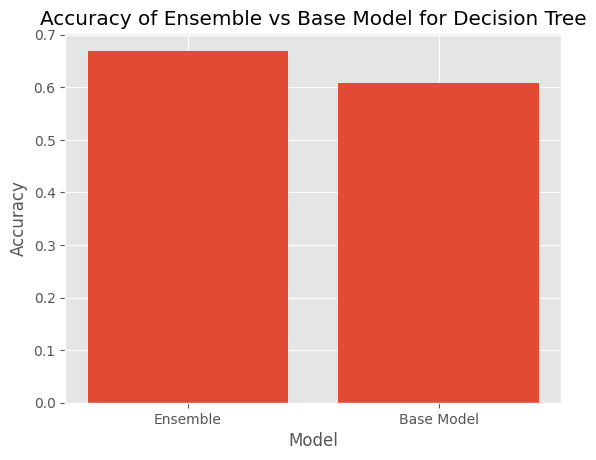

In [487]:
#Plot the bar graph
accuracy = [ensemble_accuracy, base_model_accuracy]
plt.bar(['Ensemble', 'Base Model'], accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ensemble vs Base Model for Decision Tree')
plt.show()


In [ ]:
dt = DecisionTree()
base_models = [dt]
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'classification', bootstrap=True, voting='soft')
        bag.fit(X_train, y_train)
        bag.validation(X_val, y_val)
        y_pred = bag.predict(X_test)
        accuracy.append(accuracy_score(np.argmax(y_test, axis = 1), y_pred))

#plot heatmap of accuracy
accuracy = np.array(accuracy)
accuracy = accuracy.reshape(5, 5)

#plot heatmap using sns
sns.heatmap(accuracy, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of Accuracy for Decision Tree')
plt.show()

### Regression

In [387]:
# Base models
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]

In [272]:
bag_reg = Bagging(base_models, 1, 0.5, 'regression', bootstrap=True)

In [273]:
bag_reg.fit(X_train_reg, y_train_reg)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:00<00:00, 22943.15it/s]

Training for a model complete
Training for a model complete
Training for a model complete


In [274]:
y_pred_reg = bag_reg.predict(X_test_reg)

In [275]:
y_test_reg

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [276]:
y_pred_reg

array([26.21330665, 35.15680192, 17.56202937, 23.7711242 , 18.03434658,
       22.91171557, 17.01087762, 15.55237598, 22.11004296, 20.75248491,
       23.15488036, 18.77791456, -1.17145423, 22.03218638, 19.44185655,
       24.72956359, 18.7142525 ,  6.69330542, 41.6727432 , 15.55164582,
       23.09386924, 26.74449422, 13.7000398 , 23.91336323, 15.74411471,
       12.98890845, 19.80001552, 15.1932704 , 22.47986789, 19.73244496,
       20.21850895, 24.91223208, 25.72209201, 18.67128609, 15.58702791,
       17.40521637, 32.54351119, 20.34830054, 23.25170969, 21.7913827 ,
       14.55905647, 28.57641507, 42.68914278, 17.92358898, 25.94035538,
       14.70255707, 15.43206681, 24.54787371, 18.00789459, 30.78057267,
       20.41565195, 32.24559776, 16.956078  , 26.39453219, 42.14175254,
       22.39777544, 18.41680775, 31.76299391, 24.38651438, 15.07072353,
       23.66233025, 31.8181302 , 30.41237803, 17.76243417, 23.21012774,
       16.98786022, 17.35631064, 24.87271432, 30.46780547, 13.87

In [277]:
#MSE using sklearn
mean_squared_error(y_test_reg, y_pred_reg)

16.158170401505632

In [278]:
bag_reg_soft = Bagging(base_models, 1, 0.5, 'regression', bootstrap=True, voting='soft')

In [279]:
bag_reg_soft.fit(X_train_reg, y_train_reg)

100%|██████████| 10000/10000 [00:00<00:00, 34451.30it/s]

Training for a model complete
Training for a model complete
Training for a model complete


In [280]:
y_pred_reg_soft = bag_reg_soft.predict(X_test_reg)
y_pred_reg_soft

array([26.73169808, 35.57007491, 17.31520498, 24.19863415, 18.0264939 ,
       23.27089571, 17.25830738, 15.44128482, 22.42884933, 20.87246734,
       23.74692631, 18.95622646, -0.81785452, 22.40105899, 19.48070972,
       25.0787687 , 18.61269103,  6.93550202, 41.92092649, 15.53015731,
       23.5137016 , 27.00462572, 13.63938335, 23.83811596, 15.68702717,
       13.24330195, 20.28451759, 15.22181069, 22.82618384, 19.82703753,
       20.75682691, 25.06092305, 34.17908418, 18.24243138, 15.96648858,
       17.02321216, 32.79721087, 20.35726132, 23.78563521, 22.41179351,
       14.76950235, 28.81361756, 42.83485699, 18.17236172, 26.38263995,
       14.68599533, 15.31577671, 25.04735787, 18.3064451 , 30.98887364,
       20.54799427, 32.7087734 , 16.89551873, 26.4536074 , 42.77857898,
       22.63710027, 18.32028285, 31.48621531, 24.80896414, 14.96165193,
       23.5402498 , 31.38866348, 31.05307262, 17.76913162, 22.61135898,
       17.46177412, 17.45579229, 25.0386021 , 30.27581598, 13.85

In [281]:
mean_squared_error(y_test_reg, y_pred_reg_soft)

18.4255943225827

In [ ]:
# Iterate over different number of estimators 1 to 5, voting, bootstrap and plot the accuracy and training time

num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
mse = []
training_time = []
config = []

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            start = time.time()
            bag = Bagging(base_models, num, 0.5, 'regression', bootstrap=boot, voting=vote)
            bag.fit(X_train_reg, y_train_reg)
            if vote == 'soft':
                bag.validation(X_val_reg, y_val_reg)
            y_pred = bag.predict(X_test_reg)
            end = time.time()
            mse.append(mean_squared_error(y_test_reg, y_pred))
            training_time.append(end - start)
            config.append((num, vote, boot))

In [389]:
# Print config and corresponding accuracy and training time
for i in range(len(config)):
    print("Config:", config[i], " MSE: ", mse[i], " Training time: ", training_time[i])

Config: (1, 'hard', True)  MSE:  24.78286571621052  Training time:  0.4296233654022217
Config: (1, 'hard', False)  MSE:  17.987520128399037  Training time:  0.6369917392730713
Config: (1, 'soft', True)  MSE:  22.362175115534356  Training time:  0.55747389793396
Config: (1, 'soft', False)  MSE:  17.587791383295595  Training time:  0.4055783748626709
Config: (2, 'hard', True)  MSE:  23.148240477385173  Training time:  0.756699800491333
Config: (2, 'hard', False)  MSE:  24.841727446331667  Training time:  0.8151524066925049
Config: (2, 'soft', True)  MSE:  22.83882846787148  Training time:  0.6950256824493408
Config: (2, 'soft', False)  MSE:  23.828252073094173  Training time:  0.7159335613250732
Config: (3, 'hard', True)  MSE:  19.977177575562063  Training time:  1.188387393951416
Config: (3, 'hard', False)  MSE:  24.02775671820319  Training time:  0.9121954441070557
Config: (3, 'soft', True)  MSE:  19.588618891467082  Training time:  1.1812708377838135
Config: (3, 'soft', False)  MSE:  

In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
mse = []
training_time = []
config = []
lr = LinearRegression(lr=0.1, epochs=10000)
base_models = [lr]

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, frac, 'regression', bootstrap=boot, voting=vote)
                bag.fit(X_train_reg, y_train_reg)
                if vote == 'soft':
                    bag.validation(X_val_reg, y_val_reg)
                y_pred = bag.predict(X_test_reg)
                end = time.time()
                mse.append(mean_squared_error(y_test_reg, y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [521]:
df = pd.DataFrame({'Config': config, 'MSE': mse, 'Training Time': training_time})
df.head(5)

,Config,MSE,Training Time
0,"(1, hard, True, 0.15)",0.529218,0.448254
1,"(1, hard, True, 0.25)",0.405010,0.529979
2,"(1, hard, True, 0.5)",0.347199,0.515876
3,"(1, hard, True, 0.75)",0.316854,0.443483
4,"(1, hard, True, 0.9)",0.329422,0.538079


In [522]:
max_index = df["MSE"].idxmin()

# Retrieve the corresponding row
row_with_max_accuracy = df.loc[max_index]
row_with_max_accuracy

Config           (4, hard, True, 0.75)
MSE                           0.289043
Training Time                 4.904397
Name: 63, dtype: object

The best performing model is num_estimators=3, voting=hard, bootstrap=True

In [523]:
#Train ensemble model
lr = LinearRegression(lr=0.1, epochs=5000)
base_models = [lr]

bag = Bagging(base_models, 4, 0.75, 'regression', bootstrap=True, voting='hard')
bag.fit(X_train_reg, y_train_reg)
y_pred = bag.predict(X_test_reg)
ensemble_mse = mean_squared_error(y_test_reg, y_pred)

#Get base model accuracy
lr.fit(X_train_reg, y_train_reg, X_val_reg, y_val_reg, epochs=5000)
y_pred = lr.predict(X_test_reg)
base_model_mse = mean_squared_error(y_test_reg, y_pred)

100%|██████████| 5000/5000 [00:00<00:00, 11146.44it/s]


Training for a model complete


100%|██████████| 5000/5000 [00:00<00:00, 17207.85it/s]


Training for a model complete


100%|██████████| 5000/5000 [00:00<00:00, 15010.72it/s]


Training for a model complete


100%|██████████| 5000/5000 [00:00<00:00, 12230.59it/s]


Training for a model complete


100%|██████████| 5000/5000 [00:00<00:00, 14327.53it/s]


In [524]:
ensemble_mse, base_model_mse

(0.28904328064127843, 0.30486756692966965)

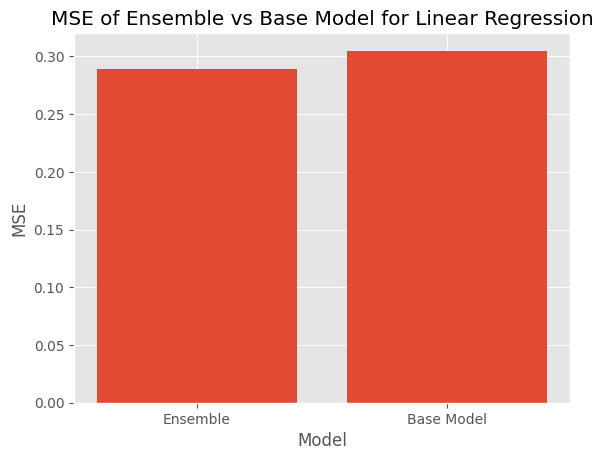

In [525]:
#Plot the bar graph
mse = [ensemble_mse, base_model_mse]
plt.bar(['Ensemble', 'Base Model'], mse)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Ensemble vs Base Model for Linear Regression')
plt.show()

In [ ]:
lr = LinearRegression(lr=0.1, epochs=10000)
base_models = [lr]
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
mse = []

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'regression', bootstrap=True, voting='soft')
        bag.fit(X_train_reg, y_train_reg)
        bag.validation(X_val_reg, y_val_reg)
        y_pred = bag.predict(X_test_reg)
        mse.append(mean_squared_error(y_test_reg, y_pred))

#plot heatmap of mse
mse = np.array(mse)
mse = mse.reshape(5, 5)

#plot heatmap using sns
sns.heatmap(mse, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of MSE')
plt.show()


In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
mse = []
training_time = []
config = []
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 2, [16,8], activation='relu', learning_rate=0.01, optimizer='batch')

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, 0.5, 'regression', bootstrap=boot, voting=vote)
                bag.fit(X_train_reg, y_train_reg)
                if vote == 'soft':
                    bag.validation(X_val_reg, y_val_reg)
                y_pred = bag.predict(X_test_reg)
                end = time.time()
                mse.append(mean_squared_error(y_test_reg, y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [509]:
df1 = pd.DataFrame({'Config': config, 'MSE': mse, 'Training Time': training_time})
df1.head(5)

,Config,MSE,Training Time
0,"(1, hard, True, 0.15)",0.347199,0.262550
1,"(1, hard, True, 0.25)",0.347199,0.267803
2,"(1, hard, True, 0.5)",0.347199,0.336707
3,"(1, hard, True, 0.75)",0.347199,0.226074
4,"(1, hard, True, 0.9)",0.347199,0.274535


In [510]:
max_index = df1["MSE"].idxmin()

# Retrieve the corresponding row
row_with_max_accuracy = df1.loc[max_index]
row_with_max_accuracy

Config           (3, hard, True, 0.15)
MSE                           0.302106
Training Time                 0.735069
Name: 40, dtype: object

In [ ]:
num_estimators = [1, 2, 3, 4, 5]
voting = ['hard', 'soft']
bootstrap = [True, False]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
mse = []
training_time = []
config = []
dt = DecisionTreeReg()
base_models = [dt]

for num in num_estimators:
    for vote in voting:
        for boot in bootstrap:
            for frac in fraction:
                start = time.time()
                bag = Bagging(base_models, num, frac, 'regression', bootstrap=boot, voting=vote)
                bag.fit(X_train_reg, y_train_reg)
                if vote == 'soft':
                    bag.validation(X_val_reg, y_val_reg)
                y_pred = bag.predict(X_test_reg)
                end = time.time()
                mse.append(mean_squared_error(y_test_reg, y_pred))
                training_time.append(end - start)
                config.append((num, vote, boot, frac))

In [514]:
df2 = pd.DataFrame({'Config': config, 'MSE': mse, 'Training Time': training_time})
df2.head(5)

,Config,MSE,Training Time
0,"(1, hard, True, 0.15)",0.285346,0.034268
1,"(1, hard, True, 0.25)",0.584550,0.003510
2,"(1, hard, True, 0.5)",0.342665,0.007001
3,"(1, hard, True, 0.75)",0.383084,0.007014
4,"(1, hard, True, 0.9)",0.390397,0.016032


In [515]:
max_index = df2["MSE"].idxmin()

# Retrieve the corresponding row
row_with_max_accuracy = df2.loc[max_index]
row_with_max_accuracy

Config           (4, hard, True, 0.75)
MSE                           0.204462
Training Time                  0.03221
Name: 63, dtype: object

In [516]:
#Train ensemble model]
dt = DecisionTreeReg()
base_models = [dt]

bag = Bagging(base_models, 4, 0.75, 'regression', bootstrap=True, voting='hard')
bag.fit(X_train_reg, y_train_reg)
y_pred = bag.predict(X_test_reg)
ensemble_mse = mean_squared_error(y_test_reg, y_pred)

#Get base model accuracy
dt.fit(X_train_reg, y_train_reg, X_val_reg, y_val_reg, epochs=100)
y_pred = dt.predict(X_test_reg)
base_model_mse = mean_squared_error(y_test_reg, y_pred)

Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete


In [518]:
ensemble_mse, base_model_mse

(0.20176070326761458, 0.28366371248841743)

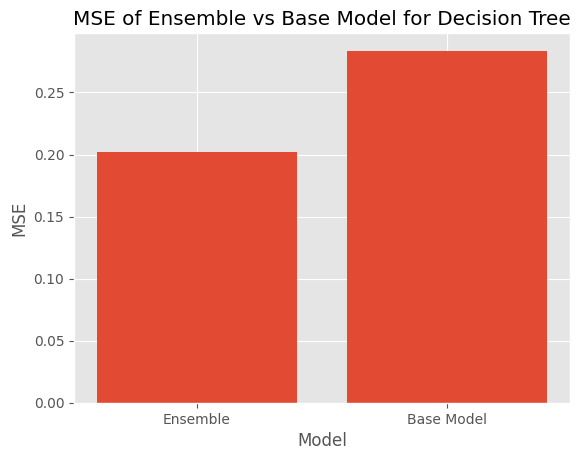

In [519]:
#Plot the bar graph
mse = [ensemble_mse, base_model_mse]
plt.bar(['Ensemble', 'Base Model'], mse)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Ensemble vs Base Model for Decision Tree')
plt.show()


In [ ]:
dt = DecisionTreeReg()
base_models = [dt]
num_estimators = [1, 2, 3, 4, 5]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
mse = []

for num in num_estimators:
    for frac in fraction:
        bag = Bagging(base_models, num, frac, 'regression', bootstrap=True, voting='soft')
        bag.fit(X_train_reg, y_train_reg)
        bag.validation(X_val_reg, y_val_reg)
        y_pred = bag.predict(X_test_reg)
        mse.append(mean_squared_error(y_test_reg, y_pred))

#plot heatmap of mse
mse = np.array(mse)
mse = mse.reshape(5, 5)

#plot heatmap using sns
sns.heatmap(mse, annot=True, xticklabels=fraction, yticklabels=num_estimators)
plt.xlabel('Fraction')
plt.ylabel('Num Estimators')
plt.title('Heatmap of MSE')
plt.show()

## **Stacking**

### **Blending**

In [339]:
class Blending():
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit_base_models(self, X_train, y_train, X_val, y_val, epochs=100):
        self.trained_models = []
        for model in self.base_models:
            model.fit(X_train, y_train, X_val, y_val, epochs=epochs)
            self.trained_models.append(model)

    def predict_base_models(self, X_val):
        predictions = []
        for model in self.trained_models:
            pred = model.predict(X_val)
            if pred.ndim == 1:
                pred = pred.reshape(-1, 1)
            predictions.append(pred)
            # print("model pred shape", pred.shape)

        # print("type of predictions:", type(predictions))
        # print("type of pred element", type(predictions[0]))
        # print("prediction[0]", predictions[0])
        # print("predictions shape:", predictions[0].shape)
        predictions = np.hstack(predictions)
        return np.array(predictions)
    
    def fit_meta_model(self, X, y, X_val, y_val, epochs=100): #Give this function the predictions of the base models
        self.meta_model.fit(X, y, X_val, y_val, epochs=epochs)   

    def predict_meta_model(self, X_test):
        predictions = self.predict_base_models(X_test)
        return self.meta_model.predict(predictions)
        



Blending Classification: Decision Tree meta model

In [345]:
#Base models
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
dt_meta = DecisionTree()
meta_model = dt_meta

In [346]:
blend = Blending(base_models, meta_model)
blend.fit_base_models(X_train, y_train, X_val, y_val)

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:06<00:00, 439.98it/s]
C:\Users\Ishan\AppData\Local\Temp\ipykernel_18352\4258058711.py:37: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(output)) / m


In [347]:
data_for_meta_model = blend.predict_base_models(X_val)
data_for_meta_model.shape, data_for_meta_model

((114, 18),
 array([[0.00561579, 0.01865227, 0.7469735 , ..., 0.        , 0.        ,
         0.        ],
        [0.01883366, 0.02045827, 0.10312814, ..., 0.        , 1.        ,
         0.        ],
        [0.01850751, 0.03636672, 0.56322335, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.01341301, 0.04800087, 0.78286678, ..., 0.        , 0.        ,
         0.        ],
        [0.02841237, 0.0303288 , 0.51214733, ..., 0.        , 0.        ,
         0.        ],
        [0.0171235 , 0.02702958, 0.66935358, ..., 0.        , 0.        ,
         0.        ]]))

In [348]:
blend.fit_meta_model(data_for_meta_model, y_val, X_val, y_val)

In [355]:
y_pred = blend.predict_meta_model(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape, y_pred 

((115,),
 array([3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3,
        3, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 1, 2, 3,
        3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2,
        2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 0, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 0, 3, 3, 2,
        3, 3, 3, 3, 3], dtype=int64))

In [358]:
y_test = np.argmax(y_test, axis=1)

In [359]:
accuracy_score(y_test, y_pred)

0.5043478260869565

In [344]:
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
dt_meta = DecisionTree()
meta_model = dt_meta

st = time.time()
blend = Blending(base_models, meta_model)
blend.fit_base_models(X_train, y_train, X_val, y_val)
data_for_meta_model = blend.predict_base_models(X_val)
blend.fit_meta_model(data_for_meta_model, y_val, X_val, y_val)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 3000/3000 [00:04<00:00, 722.90it/s]


Training Time:  4.269824743270874


In [345]:
y_pred = blend.predict_meta_model(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.5217391304347826


In [340]:
class MultinomialLogisticRegressionMeta:
    def __init__(self, learning_rate=0.01, num_iterations=3000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y, y_pred):
        m = y.shape[0]
        y_true = y.reshape(m, -1)
        y_pred = y_pred.reshape(m, -1)

        epsilon = 1e-15  # for numerical stability
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Calculate cross-entropy loss
        
        loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m

        return loss

    def gradient_descent(self,X, y, y_pred):
        m = y.shape[0]
        error = y_pred - y  # Update: Subtract y from y_pred
        gradient = np.dot(X.T, error) / m
        return gradient


    def fit(self, X_train, y_train, X_val, y_val, epochs=1000):
        num_samples, num_features = X_train.shape
        num_classes = 6
        # print("Num classes:", num_classes)

        # Initialize weights and bias
        self.theta = np.zeros((num_features, num_classes))

        for iteration in range(self.num_iterations):
            # Forward pass
            scores = np.dot(X_train, self.theta)
            # print("X_train shape:", X_train.shape)
            probabilities = self.softmax(scores)
            # print("Probabilities shape:", probabilities.shape)
            # print("probabilities:", probabilities)

            # Compute loss
            loss = self.cross_entropy_loss(y_train, probabilities)

            # Compute gradients
            gradient = self.gradient_descent(X_train, y_train, probabilities)

            # Update weights
            self.theta -= self.learning_rate * gradient

            # # Print loss for every 100 iterations
            # if iteration % 100 == 0:
            #     print(f"Iteration {iteration}, Loss: {loss}")

    def predict(self, X_test):
        if self.theta is None:
            raise ValueError("Model not trained. Please call fit() before predict().")

        scores = np.dot(X_test, self.theta)
        probabilities = self.softmax(scores)
        predictions = np.argmax(probabilities, axis=1)

        return predictions

Blending Classification: Logistic Regression meta model

In [350]:
log_reg = MultinomialLogisticRegressionMeta()
meta_model = log_reg

In [351]:
blend = Blending(base_models, meta_model)
blend.fit_base_models(X_train, y_train, X_val, y_val)

100%|██████████| 3000/3000 [00:02<00:00, 1152.11it/s]
C:\Users\Ishan\AppData\Local\Temp\ipykernel_14648\4258058711.py:37: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(output)) / m
C:\Users\Ishan\AppData\Local\Temp\ipykernel_14648\4258058711.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(output)) / m


In [352]:
data_for_meta_model = blend.predict_base_models(X_val)

In [353]:
blend.fit_meta_model(data_for_meta_model, y_val, X_val, y_val)

In [354]:
y_pred = blend.predict_meta_model(X_test)

In [355]:
accuracy_score(np.argmax(y_test, axis=1), y_pred)

0.6

In [346]:
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
log_reg = MultinomialLogisticRegressionMeta()
meta_model = log_reg

st = time.time()
blend = Blending(base_models, meta_model)
blend.fit_base_models(X_train, y_train, X_val, y_val)
data_for_meta_model = blend.predict_base_models(X_val)
blend.fit_meta_model(data_for_meta_model, y_val, X_val, y_val)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 3000/3000 [00:04<00:00, 709.12it/s]


Training Time:  4.673414945602417


In [349]:
y_pred = blend.predict_meta_model(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6521739130434783


Blending Regression: Decision Tree meta model

In [59]:
#Base models 
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]
dtr_meta = DecisionTreeReg()
meta_model = dtr_meta

In [60]:
blend_reg = Blending(base_models, meta_model)
blend_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

100%|██████████| 10000/10000 [00:00<00:00, 17518.33it/s]


In [61]:
data_for_meta_model = blend_reg.predict_base_models(X_val_reg)

In [64]:
blend_reg.fit_meta_model(data_for_meta_model, y_val_reg, X_val_reg, y_val_reg)

In [65]:
y_pred_reg = blend_reg.predict_meta_model(X_test_reg)

In [67]:
mean_squared_error(y_test_reg, y_pred_reg)

0.22069382512897406

In [359]:
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]
dtr_meta = DecisionTreeReg()
meta_model = dtr_meta

st = time.time()
blend_reg = Blending(base_models, meta_model)
blend_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
data_for_meta_model = blend_reg.predict_base_models(X_val_reg)
blend_reg.fit_meta_model(data_for_meta_model, y_val_reg, X_val_reg, y_val_reg)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 10000/10000 [00:00<00:00, 21471.08it/s]

Training Time:  0.5165293216705322


In [360]:
y_pred_reg = blend_reg.predict_meta_model(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.25819335732031184
R2:  0.7027758873451391


Blending Regression: Linear Regression meta model

In [361]:
lr_meta = LinearRegression(lr=0.1, epochs=5000)
meta_model = lr_meta
blend_reg = Blending(base_models, meta_model)

st = time.time()
blend_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
data_for_meta_model = blend_reg.predict_base_models(X_val_reg)
blend_reg.fit_meta_model(data_for_meta_model, y_val_reg, X_val_reg, y_val_reg)
ed = time.time()
training_time = ed - st
y_pred_reg = blend_reg.predict_meta_model(X_test_reg)
print("Training Time: ",training_time)

100%|██████████| 5000/5000 [00:00<00:00, 27717.04it/s]

Training Time:  0.8661494255065918


In [362]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.2052082324575586
R2:  0.763770704890741


### **Stacking**

In [363]:
kf = KFold(n_splits=5, shuffle=False)

In [374]:
class Stacking:
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit_meta_model(self, X_train, y_train, X_val, y_val, epochs=100):
        all_predictions = []
        y = []
        for model in self.base_models:
            model_predictions = []
            for train_index, val_index in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                model.fit(X_train_fold, y_train_fold, X_val_fold, y_val_fold, epochs=epochs)
                pred = model.predict(X_val_fold)
                # print("Pred shape:", pred.shape)
                # print(type(pred))
                if pred.ndim == 1:
                    pred = pred.reshape(-1, 1)
                model_predictions.extend(pred)
                y.extend(y_val_fold)


            all_predictions.append(list(model_predictions))
        
        list_to_stack = []
        for mat in all_predictions:
            list_to_stack.append(mat)

        # print("List to stack shape:", np.array(list_to_stack).shape)
        all_predictions = np.hstack(list_to_stack)

        y = np.array(y[:323]) #For regression 323 and for classification 914
        # print("All predictions shape:", all_predictions.shape)
        self.meta_model.fit(all_predictions, y, X_val, y_val, epochs=epochs)

    def fit_base_models(self, X_train, y_train, X_val, y_val, epochs=100):
        self.trained_models = []
        for model in self.base_models:
            model.fit(X_train, y_train, X_val, y_val, epochs=epochs)
            self.trained_models.append(model)

    def predict_meta_model(self, X_test):
        predictions = []
        for model in self.trained_models:
            pred = model.predict(X_test)
            if pred.ndim == 1:
                pred = pred.reshape(-1, 1)
            predictions.append(pred)

        predictions = np.hstack(predictions)
        return self.meta_model.predict(predictions)
    

Stacking Classification: Decision Tree meta model

In [242]:
#Base models
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
dt_meta = DecisionTree()
meta_model = dt_meta

In [243]:
stacking = Stacking(base_models, meta_model)
stacking.fit_meta_model(X_train, y_train, X_val, y_val)


100%|██████████| 3000/3000 [00:02<00:00, 1122.78it/s]


In [244]:
stacking.fit_base_models(X_train, y_train, X_val, y_val)

100%|██████████| 3000/3000 [00:02<00:00, 1153.32it/s]


In [245]:
y_pred = stacking.predict_meta_model(X_test)

In [246]:
accuracy_score(y_test, y_pred)

0.5130434782608696

In [367]:
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
dt_meta = DecisionTree()
meta_model = dt_meta

stacking = Stacking(base_models, meta_model)

st = time.time()
stacking.fit_meta_model(X_train, y_train, X_val, y_val)
stacking.fit_base_models(X_train, y_train, X_val, y_val)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 3000/3000 [00:03<00:00, 777.64it/s]


Training Time:  22.880735635757446


In [370]:
y_pred = stacking.predict_meta_model(X_test)
y_pred = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.5130434782608696


In [371]:
class MultinomialLogisticRegressionMeta:
    def __init__(self, learning_rate=0.01, num_iterations=3000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y, y_pred):
        m = y.shape[0]
        y_true = y.reshape(m, -1)
        y_pred = y_pred.reshape(m, -1)

        epsilon = 1e-15  # for numerical stability
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Calculate cross-entropy loss
        
        loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m

        return loss

    def gradient_descent(self,X, y, y_pred):
        m = y.shape[0]
        error = y_pred - y  # Update: Subtract y from y_pred
        gradient = np.dot(X.T, error) / m
        return gradient


    def fit(self, X_train, y_train, X_val, y_val, epochs=1000):
        num_samples, num_features = X_train.shape
        num_classes = len(np.unique(np.argmax(y_train, axis = 1)))
        # print("Num classes:", num_classes)

        # Initialize weights and bias
        self.theta = np.zeros((num_features, num_classes))

        for iteration in range(self.num_iterations):
            # Forward pass
            scores = np.dot(X_train, self.theta)
            # print("X_train shape:", X_train.shape)
            probabilities = self.softmax(scores)
            # print("Probabilities shape:", probabilities.shape)
            # print("probabilities:", probabilities)

            # Compute loss
            loss = self.cross_entropy_loss(y_train, probabilities)

            # Compute gradients
            gradient = self.gradient_descent(X_train, y_train, probabilities)

            # Update weights
            self.theta -= self.learning_rate * gradient

            # # Print loss for every 100 iterations
            # if iteration % 100 == 0:
            #     print(f"Iteration {iteration}, Loss: {loss}")

    def predict(self, X_test):
        if self.theta is None:
            raise ValueError("Model not trained. Please call fit() before predict().")

        scores = np.dot(X_test, self.theta)
        probabilities = self.softmax(scores)
        predictions = np.argmax(probabilities, axis=1)

        return predictions

Stacking Classification: Logistice Regression meta model

In [307]:
log_reg = MultinomialLogisticRegressionMeta()
meta_model = log_reg

In [ ]:
stack = Stacking(base_models, meta_model)
stack.fit_meta_model(X_train, y_train, X_val, y_val)    

In [ ]:
stack.fit_base_models(X_train, y_train, X_val, y_val)

In [310]:
y_pred = stack.predict_meta_model(X_test)

In [311]:
accuracy_score(np.argmax(y_test, axis=1), y_pred)

0.5652173913043478

In [372]:
mlr = MultinomialLogisticRegression(X_train, y_train, X_val, y_val, 6)
mlp = MLPClassifier(X_train.shape[1], 6, 2, [16, 8], activation='relu', learning_rate=0.01, optimizer='batch')
dt = DecisionTree()
base_models = [mlr, mlp, dt]
log_reg = MultinomialLogisticRegressionMeta()
meta_model = log_reg

st = time.time()
stack = Stacking(base_models, meta_model)
stack.fit_meta_model(X_train, y_train, X_val, y_val) 
stack.fit_base_models(X_train, y_train, X_val, y_val)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 3000/3000 [00:04<00:00, 724.86it/s]


Training Time:  25.02446484565735


In [373]:
y_pred = stack.predict_meta_model(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6869565217391305


Stacking Regression: Decision Tree meta model

In [85]:
#Base models 
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]
dtr_meta = DecisionTreeReg()
meta_model = dtr_meta

In [86]:
stack_reg = Stacking(base_models, meta_model)
stack_reg.fit_meta_model(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

100%|██████████| 10000/10000 [00:00<00:00, 23863.50it/s]


In [87]:
stack_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

100%|██████████| 10000/10000 [00:00<00:00, 21682.15it/s]


In [88]:
y_pred_reg = stack_reg.predict_meta_model(X_test_reg)

In [89]:
mean_squared_error(y_test_reg, y_pred_reg)

0.22265542627005872

In [375]:
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]
dtr_meta = DecisionTreeReg()
meta_model = dtr_meta

stack_reg = Stacking(base_models, meta_model)
st = time.time()
stack_reg.fit_meta_model(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
stack_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 10000/10000 [00:00<00:00, 19131.34it/s]

Training Time:  3.434962511062622


In [376]:
y_pred_reg = stack_reg.predict_meta_model(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.3825477327099515
R2:  0.5596230221299368


Stacking Regression: Decision Tree meta model

In [90]:
lr_meta = LinearRegression(lr=0.1, epochs=5000)
meta_model = lr_meta
stack_reg = Stacking(base_models, meta_model)
stack_reg.fit_meta_model(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

100%|██████████| 5000/5000 [00:00<00:00, 15364.23it/s]


In [91]:
stack_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

100%|██████████| 10000/10000 [00:00<00:00, 17771.74it/s]


In [92]:
y_pred_reg = stack_reg.predict_meta_model(X_test_reg)
mean_squared_error(y_test_reg, y_pred_reg)

0.18358995070977327

In [377]:
lr = LinearRegression(lr=0.1, epochs=10000)
mlpr = MLPRegressor(X_train_reg.shape[1], 1, 1, [16], activation='relu', learning_rate=0.01, optimizer='batch')
dtr = DecisionTreeReg()
base_models = [lr, mlpr, dtr]
lr_meta = LinearRegression(lr=0.1, epochs=5000)
meta_model = lr_meta

stack_reg = Stacking(base_models, meta_model)
st = time.time()
stack_reg.fit_meta_model(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
stack_reg.fit_base_models(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
ed = time.time()
training_time = ed - st
print("Training Time: ",training_time)

100%|██████████| 10000/10000 [00:00<00:00, 19495.16it/s]

Training Time:  3.868783950805664


In [378]:
y_pred_reg = stack_reg.predict_meta_model(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.18667201775087222
R2:  0.7851090151608225


## **Report**<br>

### Bagging models
1. Classification models
 - Multinomial Logistic Regression<br>
    - Training time: 3.291476
    - Accuracy: 0.695652

 - Multilayer Perceptron (MLP)<br>
    - Training time: 0.337466
    - Accuracy: 0.556522

 - Decision Tree Classifier<br>
    - Training time: 0.046432
    - Accuracy: 0.686957

 2. Regression models
 - Linear Regression<br>
    - Training time: 4.904397
    - MSE: 0.289043

 - Multilayer Perceptron (MLP)<br>
    - Training time: 0.735069
    - MSE: 0.302106

 - Decision Tree Regressor <br>
    - Training time: 0.03221
    - MSE: 0.204462

### Blending models
1. Classification models
- Decision Tree Classifier as meta model<br>
   - Training time: 4.269824743270874
   - Accuracy: 0.5217391304347826

- Multinomial Logistic Regression as meta model<br>
   - Training time: 4.673414945602417
   - Accuracy: 0.6521739130434783

2. Regression models
- Decision Tree Regressor as meta model<br>
   - Training time: 0.5165293216705322
   - MSE: 0.25819335732031184
   - R2 score: 0.7027758873451391

- Linear Regression as meta model<br>
   - Training time: 0.8661494255065918
   - MSE: 0.2052082324575586
   - R2 score: 0.763770704890741

### Stacking models
1. Classification models
- Decision Tree Classifier as meta model<br>
   - Training time: 22.880735635757446
   - Accuracy: 0.5130434782608696

- Multinomial Logistic Regression as meta model<br>
   - Training time:  25.02446484565735
   - Accuracy: 0.6869565217391305

2. Regression models
- Decision Tree Regressor as meta model<br>
   - Training time: 3.434962511062622
   - MSE: 0.3825477327099515
   - R2 score: 0.5596230221299368
- Linear Regression as meta model<br>
   - Training time: 3.868783950805664
   - MSE: 0.18667201775087222
   - R2 score: 0.7851090151608225

# **Random Forest vs Boosted Trees**

### Classification

In [379]:
df_cla = pd.read_csv('WineQT.csv')
df_cla.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [380]:
df_cla = df_cla.drop(['Id'], axis=1)

In [381]:
df_cla['quality'] = df_cla['quality'].replace([3, 4, 5], 0).replace([6, 7, 8], 1)
df_cla.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [382]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(df_cla[['quality']])

c:\Users\Ishan\Desktop\Ishan\IIITH\3-1\SMAI\Assignments\Assignment - 4\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [383]:
scaler = StandardScaler()
# X is all the columns except 'quality'
X = df_cla.drop(['quality'], axis=1)
X = X.values
X = scaler.fit_transform(X)

In [384]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_rf, y_train_rf, test_size=0.2, random_state=42)

In [481]:
class BaggingRF:
    def __init__(self, base_model, num_estimators, frac, task, bootstrap = True, voting  = 'hard'):
        self.base_models = base_model
        self.num_estimators = num_estimators
        self.frac = frac
        self.bootstrap = bootstrap
        self.voting = voting
        self.task = task
        self.accuracy = []
        # self.weights = np.array([0.2]*self.num_estimators+[0.3]*self.num_estimators+[0.5]*self.num_estimators) 
        self.selected_features = []

    def fit(self, X, y):

        self.trained_models = []
        num_features = X.shape[1]
        # print("num features", num_features)
        for model in self.base_models:
            #Get copy of model
            model = copy.deepcopy(model)
            for num in range(self.num_estimators):
                selected_features = np.random.choice(num_features, size=int(self.frac * num_features), replace=False)
                self.selected_features.append(selected_features)
                X_new = X[:, selected_features]

                if self.bootstrap == True:
                    X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=1-self.frac, random_state=num)
                    model.fit(X_train, y_train, X_val, y_val, epochs=100)
                    self.trained_models.append(model)
                    # print("Training for a model complete")
                

    def predict(self, X_test):
        
        # print("Selected features:", selected_features)
        # print(X_test.shape)
        
        if self.task == 'classification':
            predictions_classification = []
            predictions_regression = []
            for model, features in zip(self.trained_models, self.selected_features):
                pred = model.predict(X_test[:, features])
                # print(pred.shape)
                pred_cla = np.argmax(pred, axis=1)
                predictions_regression.append(pred)
                predictions_classification.append(pred_cla)
            predictions_classification = np.array(predictions_classification)
            predictions_regression = np.array(predictions_regression)

            # print(predictions.shape)
            if self.voting == 'hard':
                hard_votes = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions_classification)
                # The 'hard_votes' array now contains the majority vote for each sample
                # print(hard_votes)
                # print(hard_votes.shape)
                return hard_votes
            
        elif self.task == 'regression':
            if self.voting == 'hard':
                predictions = []
                for model, features in zip(self.trained_models, self.selected_features):
                    pred = model.predict(X_test[:, features])
                    # print("Pred:",pred)
                    pred = pred.flatten()
                    # print("Pred flattened:",pred)
                    predictions.append(pred)
                    # print(pred.shape)
                predictions = np.array(predictions)
                # print(predictions.shape)
                # take mean for each column
                hard_votes = np.mean(predictions, axis=0)
                # hard_votes = np.mean(predictions, axis=1)
                return hard_votes

In [482]:
dt = DecisionTree()
base_models = [dt]
rf = BaggingRF(base_models, 5, 0.75, 'classification', bootstrap=True, voting='hard')
rf.fit(X_train_rf, y_train_rf)
y_pred = rf.predict(X_test_rf)


In [483]:
y_test_rf.shape, y_pred.shape

((229, 2), (229,))

In [484]:
np.argmax(y_test_rf, axis = 1)

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [485]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [486]:
accuracy_score(np.argmax(y_test_rf, axis = 1), y_pred)

0.5414847161572053

In [488]:
# Get best config num_estimators and fraction
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
fraction = [0.15, 0.25, 0.5, 0.75, 0.9]
accuracy = []
config = []
training_time = []
best_accuracy = 0
best_config = (0, 0)

for num in num_estimators:
    for frac in fraction:
        start = time.time()
        rf = BaggingRF(base_models, num, frac, 'classification', bootstrap=True, voting='hard')
        rf.fit(X_train_rf, y_train_rf)
        y_pred = rf.predict(X_test_rf)
        end = time.time()
        acc = accuracy_score(np.argmax(y_test_rf, axis = 1), y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_config = (num, frac)
        accuracy.append(accuracy_score(np.argmax(y_test_rf, axis = 1), y_pred))
        config.append((num, frac))
        training_time.append(end - start)

print("Best accuracy:", best_accuracy)
print("Best config:", best_config)

Best accuracy: 0.7117903930131004
Best config: (1, 0.9)


In [489]:
#Change the number of estimators and store accuracy and training time
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
accuracy = []
training_time = []
for num in num_estimators:
    bagging_rf = BaggingRF(base_models, num, 0.9, 'classification', bootstrap=True, voting='hard')
    start = time.time()
    bagging_rf.fit(X_train_rf, y_train_rf)
    end = time.time()
    y_pred_rf = bagging_rf.predict(X_test_rf)
    acc = accuracy_score(np.argmax(y_test_rf, axis = 1), y_pred_rf)
    accuracy.append(acc)
    training_time.append(end-start)

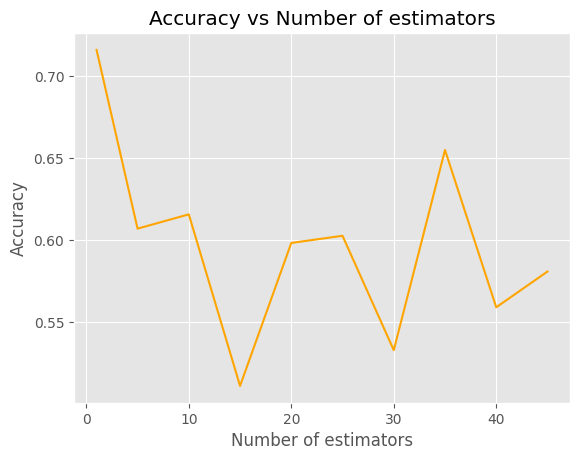

In [490]:
#Plot accuracy vs number of estimators
plt.plot(num_estimators, accuracy, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of estimators')
plt.show()


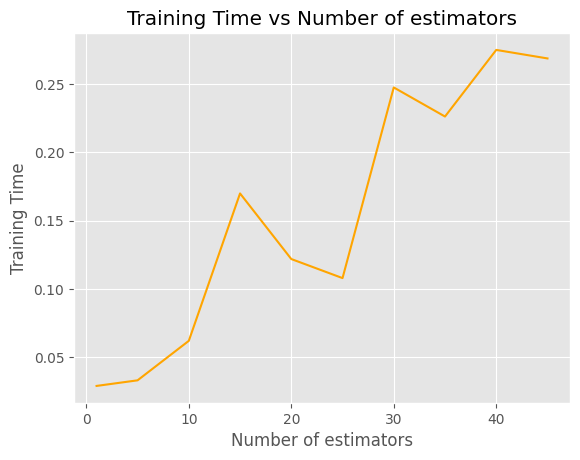

In [446]:
#plot training time vs number of estimators
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Number of estimators')
plt.show()


In [296]:
dt = DecisionTree()
base_models = [dt]

In [297]:
bagging_rf = Bagging(base_models, 10, 0.5, 'classification', bootstrap=True)

In [299]:
bagging_rf.fit(X_train_rf, y_train_rf)

Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete


In [300]:
y_pred_rf = bagging_rf.predict(X_test_rf)
y_pred_rf

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [301]:
accuracy_score(y_test_rf, y_pred_rf)

0.7248908296943232

In [ ]:
#Change the number of estimators and store accuracy and training time
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
accuracy = []
training_time = []
for num in num_estimators:
    bagging_rf = Bagging(base_models, num, 0.5, 'classification', bootstrap=True)
    start = time.time()
    bagging_rf.fit(X_train_rf, y_train_rf)
    end = time.time()
    y_pred_rf = bagging_rf.predict(X_test_rf)
    acc = accuracy_score(np.argmax(y_test_rf, axis = 1), y_pred_rf)
    accuracy.append(acc)
    training_time.append(end-start)
    

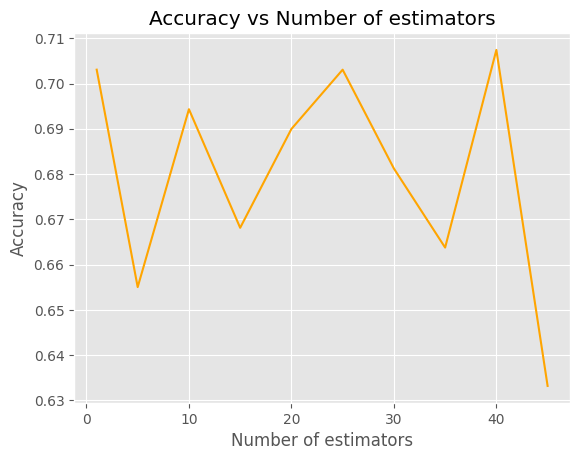

In [470]:
#Plot accuracy vs number of estimators
plt.plot(num_estimators, accuracy, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of estimators')
plt.show()


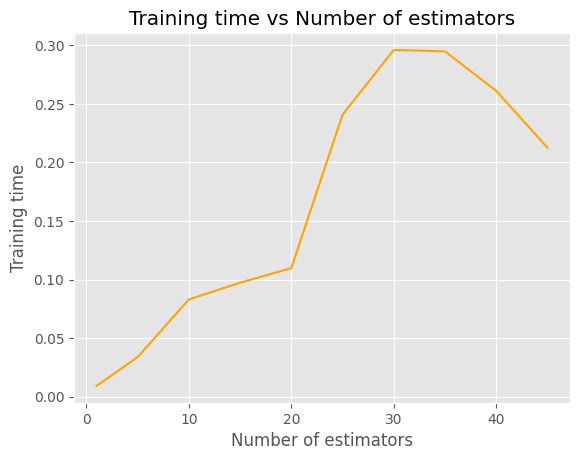

In [305]:
#Plot training time vs number of estimators
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training time')
plt.title('Training time vs Number of estimators')
plt.show()


### Regression

In [ ]:
dt_reg = DecisionTreeReg()
base_models = [dt_reg]
bagging_rf_reg = BaggingRF(base_models, num, 0.75, 'regression', bootstrap=True, voting='hard')
bagging_rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = bagging_rf_reg.predict(X_test_reg)

In [443]:
mse = mean_squared_error(y_test_reg, y_pred_rf)
r2 = r2_score(y_test_reg, y_pred_rf)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.7271264196361472
R2:  0.16295482150555685


In [302]:
dt_rf_reg = DecisionTreeReg()
base_models = [dt_rf_reg]

In [303]:
bagging_rf_reg = Bagging(base_models, 10, 0.5, 'regression', bootstrap=True)

In [304]:
bagging_rf_reg.fit(X_train_reg, y_train_reg)

Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete
Training for a model complete


In [305]:
y_pred_rf_reg = bagging_rf_reg.predict(X_test_reg)
y_pred_rf_reg

array([22.68909091, 29.32307692, 20.18333333, 22.68909091, 16.73846154,
       22.68909091, 16.73846154, 16.73846154, 19.784     , 22.68909091,
       20.18333333, 27.1       ,  8.75      , 22.68909091, 22.68909091,
       50.        , 20.18333333,  8.75      , 45.88571429, 13.22      ,
       22.68909091, 22.68909091, 16.73846154, 19.784     ,  8.75      ,
       13.22      , 22.68909091, 13.4       , 20.18333333, 22.68909091,
       20.18333333, 22.68909091, 50.        , 19.784     , 16.73846154,
       13.5       , 33.7625    , 19.784     , 20.18333333, 22.68909091,
       16.73846154, 29.32307692, 45.88571429, 22.68909091, 22.68909091,
        8.75      , 16.73846154, 22.68909091, 16.73846154, 22.68909091,
       22.68909091, 29.32307692, 16.73846154, 29.32307692, 45.88571429,
       19.784     , 16.73846154, 29.32307692, 22.68909091, 27.1       ,
       29.32307692, 33.7625    , 22.68909091, 19.784     , 22.68909091,
       16.73846154,  8.75      , 22.68909091, 22.68909091, 13.5 

In [307]:
y_test_reg

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [306]:
mean_squared_error(y_test_reg, y_pred_rf_reg)

46.85699717490057

In [ ]:
#Change the number of estimators and store accuracy and training time
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
accuracy = []
training_time = []
for num in num_estimators:
    bagging_rf_reg = Bagging(base_models, num, 0.5, 'regression', bootstrap=True)
    start = time.time()
    bagging_rf_reg.fit(X_train_reg, y_train_reg)
    end = time.time()
    y_pred_rf_reg = bagging_rf_reg.predict(X_test_reg)
    acc = mean_squared_error(y_test_reg, y_pred_rf_reg)
    accuracy.append(acc)
    training_time.append(end-start)

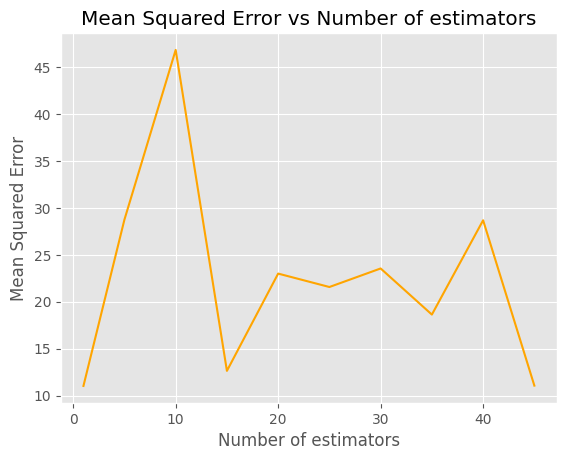

In [310]:
#Plot accuracy vs number of estimators
plt.plot(num_estimators, accuracy, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of estimators')
plt.show()


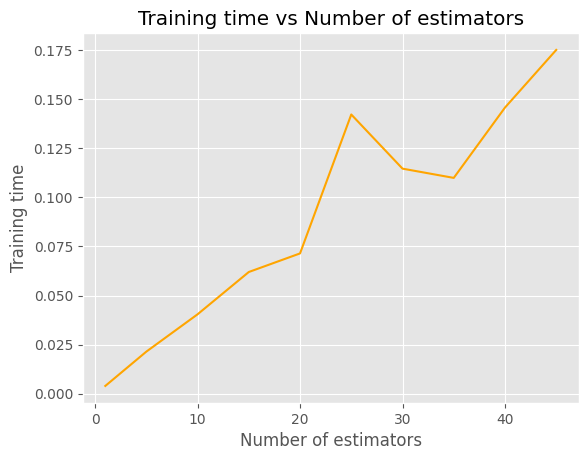

In [311]:
#Plot training time vs number of estimators
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of estimators')
plt.ylabel('Training time')
plt.title('Training time vs Number of estimators')
plt.show()


In [213]:
from tqdm import tqdm

In [22]:
class AdaBoost:
    def __init__(self, base_model, num_learners):
        self.base_model = base_model
        self.num_learners = num_learners
        self.alpha = []
        self.learners = []
        self.feature_list = []

    def update_weights(self, weights, misclassified, alpha):
        # Update weights based on whether the sample is misclassified or not
        # print("weights:", weights )
        weights_updated = weights * np.exp(alpha * misclassified) + (1 - misclassified) * np.exp(-alpha)
        # print("weights updated:", weights_updated)
        # Normalize the weights to ensure they sum to 1
        weights_updated /= np.sum(weights_updated)
        # print("weights updated after normalization:", weights_updated)
        return weights_updated
    
    def get_index(self,num, bins):
        idx = num > bins
        return np.where(idx == False)[0][0]

    def get_data(self, bins, X, y):
        chosen_idx = []
        for i in range(X.shape[0]):
            num = np.random.uniform(0,1)
            # print("Num:", num)
            index = self.get_index(num, bins)
            # print("Index:", index)
            chosen_idx.append(index)

        # print("Chosen idx:", chosen_idx)
        X_train_selected = X[chosen_idx]
        y_train_selected = y[chosen_idx]

        return X_train_selected, y_train_selected


    def fit(self, X_train, y_train, X_val, y_val, epochs=100):
        self.weights = np.ones(X_train.shape[0]) / X_train.shape[0]
        self.X_train = X_train
        self.y_train = y_train
        num_range = X_train.shape[1]
        for i in range(self.num_learners):
            print("Iteration:", i)
            lowest_entropy = 9999
            best_model = None
            X_train = self.X_train
            y_train = self.y_train
            # print("X_train shape:", X_train.shape[1])

            feature_id = 0
            
            
            model = copy.deepcopy(self.base_model)
            model.fit(X_train, y_train, X_val, y_val, epochs=epochs)
                    
            self.learners.append(model)
            # print("Feature id appended")
            # print(self.feature_list)
            # self.feature_list.append(feature_id)

            pred = model.predict(X_train)
            pred = np.argmax(pred, axis=1)

            y_train = np.array(y_train).astype(int)
            pred = np.array(pred).astype(int)
            
            misclassified = (np.argmax(y_train, axis = 1) != pred).astype(int) # 1 if misclassified, 0 if classified correctly
            
            error = np.sum(self.weights * misclassified)
            if error == 0:
                error = 1e-5
            
            print("Error:", error)
            alpha = 0.5 * np.log((1 - error) / error)
            print("Alpha:", alpha)
            self.alpha.append(alpha)
            # print("weights before:", self.weights)
            self.weights = self.update_weights(self.weights, misclassified, alpha)
            # print("weights after:", self.weights)
            bins = np.cumsum(self.weights)
            self.X_train, self.y_train = self.get_data(bins, X_train, y_train)
            # print("X_train shape:", self.X_train.shape)
            # print("y_train shape:", self.y_train.shape)

    def predict(self, X_test):
        predictions = []
        
        for model in self.learners:
            pred = model.predict(X_test)
            predictions.append(pred)
        
        preds = np.array(predictions)
        self.alpha = np.array(self.alpha)/sum(self.alpha)
        preds = preds * self.alpha[:,None,None]

        preds = np.transpose(preds, (1, 0, 2))
        preds = np.sum(preds, axis=1)
        preds = np.argmax(preds, axis=1)
        return preds
        
        

Ada-Boost Classification

In [332]:
dt = DecisionTree()
base_model = dt
ada = AdaBoost(base_model, 5)
ada.fit(X_train_rf[:, 1:], y_train_rf, X_val_rf[:, 1:], y_val_rf)

Iteration: 0
Error: 0.20383036935704513
Alpha: 0.6812620708929894
Iteration: 1
Error: 0.02233376892500901
Alpha: 1.8895342500647954
Iteration: 2
Error: 0.016783174230195267
Alpha: 2.035226410378066
Iteration: 3
Error: 0.00832189342749276
Alpha: 2.390254380461511
Iteration: 4
Error: 1e-05
Alpha: 5.756457732460114


In [333]:
preds = ada.predict(X_test_rf[:,1:])

In [334]:
preds.shape

(229,)

In [335]:
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [336]:
y_test_rf

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [337]:
# y_test_rf = np.argmax(y_test_rf, axis=1)
accuracy_score(y_test_rf, preds)

0.7554585152838428

In [26]:
import copy

In [ ]:
# Get accuracy and training time for different number of learners
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
accuracy = []
training_time = []
dt = DecisionTree()
base_model = dt

for num in num_estimators:
    ada = AdaBoost(base_model, num)
    start = time.time()
    ada.fit(X_train_rf, y_train_rf, X_val_rf, y_val_rf)
    end = time.time()
    preds = ada.predict(X_test_rf)
    acc = accuracy_score(np.argmax(y_test_rf, axis = 1), preds)
    accuracy.append(acc)
    training_time.append(end-start)

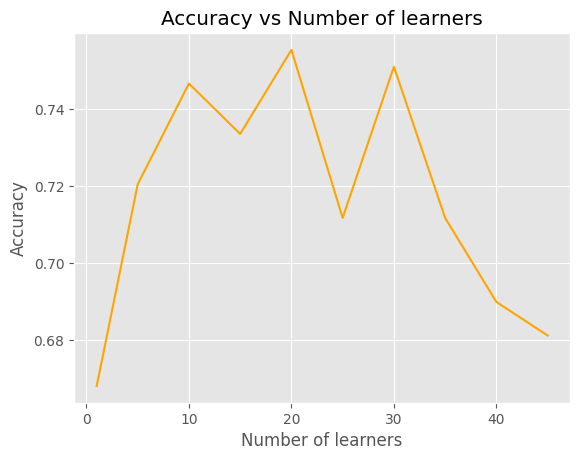

In [28]:
#plot the accuracy
plt.plot(num_estimators, accuracy, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of learners')
plt.show()

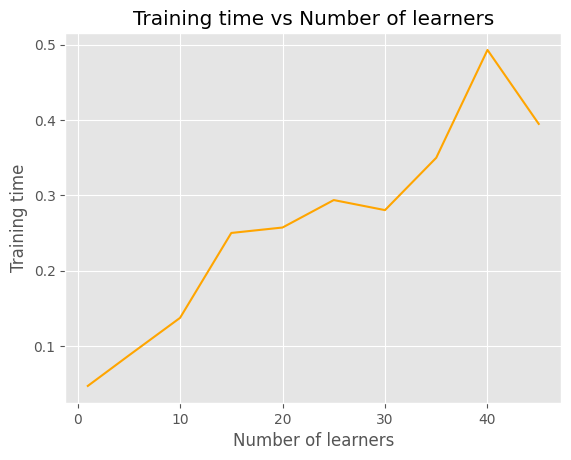

In [29]:
#Plot the training time
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Training time')
plt.title('Training time vs Number of learners')
plt.show()


Ada-Boost Regression

In [36]:
class AdaBoostReg:
    def __init__(self, base_model, num_learners):
        self.base_model = base_model
        self.num_learners = num_learners
        self.alpha = []
        self.learners = []
        self.feature_list = []

    def update_weights(self, weights, residuals, alpha):
        # Update weights based on whether the sample is misclassified or not
        # print("weights:", weights )
        weights_updated = weights * np.exp(-alpha * residuals)
        # print("weights updated:", weights_updated)
        # Normalize the weights to ensure they sum to 1
        weights_updated /= np.sum(weights_updated)
        return weights_updated
    
    def get_index(self,num, bins):
        idx = num > bins
        return np.where(idx == False)[0][0]

    def get_data(self, bins, X, y):
        chosen_idx = []
        for i in range(X.shape[0]):
            num = np.random.uniform(0,1)
            # print("Num:", num)
            index = self.get_index(num, bins)
            # print("Index:", index)
            chosen_idx.append(index)

        # print("Chosen idx:", chosen_idx)
        X_train_selected = X[chosen_idx]
        y_train_selected = y[chosen_idx]

        return X_train_selected, y_train_selected


    def fit(self, X_train, y_train, X_val, y_val, epochs=100):
        self.weights = np.ones(X_train.shape[0]) / X_train.shape[0]
        self.X_train = X_train
        self.y_train = y_train
        num_range = X_train.shape[1]
        for i in range(self.num_learners):
            print("Iteration:", i)
            lowest_entropy = 9999
            best_model = None
            X_train = self.X_train
            y_train = self.y_train
            # print("X_train shape:", X_train.shape[1])

            feature_id = 0
            
            
            model = copy.deepcopy(self.base_model)
            model.fit(X_train, y_train, X_val, y_val, epochs=epochs)
                    
            self.learners.append(model)
            # print("Feature id appended")
            # print(self.feature_list)
            # self.feature_list.append(feature_id)

            pred = model.predict(X_train)
            
            # pred = np.argmax(pred, axis=1)

            y_train = np.array(y_train).astype(int)
            pred = np.array(pred).astype(int)
            # print("y_train", np.argmax(y_train, axis = 1))
            # print("pred", pred)
            # print("y_val shape:", y_val.shape)
            # print("pred shape:", pred.shape)

            residual = y_train - pred
            error = np.sum(self.weights * np.abs(residual))
            if error == 0:
                error = 1e-5
            
            print("Error:", error)
            alpha = 0.5 * np.log((1 - error) / error)
            print("Alpha:", alpha)
            self.alpha.append(alpha)
            # print("weights before:", self.weights)
            self.weights = self.update_weights(self.weights, residual, alpha)
            # print("weights after:", self.weights)
            bins = np.cumsum(self.weights)
            self.X_train, self.y_train = self.get_data(bins, X_train, y_train)
            # print("X_train shape:", self.X_train.shape)
            # print("y_train shape:", self.y_train.shape)

    def predict(self, X_test):
        predictions = []

        for model in self.learners:
            pred = model.predict(X_test)
            predictions.append(pred)
        
        preds = np.array(predictions)
        self.alpha = np.array(self.alpha)/sum(self.alpha)
        preds = preds * self.alpha[:,None,None]

        # preds = np.transpose(preds, (1, 0, 2))
        preds = np.sum(preds, axis=1)
        # preds = np.argmax(preds, axis=1)
        preds = np.mean(preds.T, axis=1)
        return preds
        

In [440]:
dt = DecisionTreeReg()
base_model = dt
ada_reg = AdaBoostReg(base_model, 10)

In [ ]:
ada_reg.fit(X_train_reg, y_train_reg, X_val_reg, y_val_reg)

In [442]:
y_pred = ada_reg.predict(X_test_reg)
y_pred

array([[-0.00702842,  0.26876293, -0.32516023, ..., -0.2418771 ,
        -0.00702842,  0.07459452],
       [-0.0034543 ,  0.13209062, -0.15980856, ..., -0.11887687,
        -0.0034543 ,  0.03666144],
       [-0.01326886,  0.50739373, -0.6138654 , ..., -0.45663636,
        -0.01326886,  0.14082593],
       ...,
       [-0.03607938,  1.37965532, -1.66916266, ..., -1.24164083,
        -0.03607938,  0.38292007],
       [-0.03607938,  1.37965532, -1.66916266, ..., -1.24164083,
        -0.03607938,  0.38292007],
       [-0.03607938,  1.37965532, -1.66916266, ..., -1.24164083,
        -0.03607938,  0.38292007]])

In [443]:
y_pred.shape, y_test_reg.shape

((10, 102), (102,))

In [444]:
y_pred.T.shape

(102, 10)

In [445]:
y_pred = np.mean(y_pred.T, axis=1)
y_pred

array([-0.0171635 ,  0.65632273, -0.79404571, -0.0171635 , -0.64944085,
       -0.31783918, -0.06631313, -0.96196017, -0.50806474, -0.0171635 ,
       -0.22930795, -0.02863228, -0.86673991, -0.31783918, -0.0171635 ,
       -0.17873092, -0.50382015, -0.86673991,  1.93704469, -0.94518553,
       -0.0171635 , -0.0171635 , -0.19654674, -0.0895264 , -0.94518553,
       -0.52298376, -0.31783918, -0.78010993, -0.02863228, -0.0171635 ,
       -0.02928163, -0.0171635 ,  0.30102814, -0.49654842, -0.89066717,
       -0.44470309,  0.43895036, -0.1171635 , -0.02928163, -0.0171635 ,
       -0.07561379,  0.05699841,  2.03704469, -0.0171635 , -0.0171635 ,
       -0.74144273, -0.06631313, -0.0171635 , -0.65172657, -0.00411296,
       -0.0171635 ,  0.15764776, -0.06631313,  0.05699841,  1.03704469,
       -0.30257694, -0.94518553,  0.65632273, -0.0171635 , -0.02863228,
        0.05699841,  0.33125805,  0.15699841, -0.0171635 ,  0.05699841,
       -0.17332807, -0.74518553, -0.0171635 ,  0.05699841, -0.88

In [446]:
y_pred.shape, y_test_reg.shape

((102,), (102,))

In [447]:
mean_squared_error(y_test_reg, y_pred)

0.301764494358184

In [448]:
from sklearn.metrics import r2_score
r2_score(y_test_reg, y_pred)

0.6526181579680087

In [ ]:
# Get accuracy and training time for different number of learners
num_estimators = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
mse = []
r2_scr = []
training_time = []
dt = DecisionTreeReg()
base_model = dt

for num in num_estimators:
    ada_reg = AdaBoostReg(base_model, num)
    start = time.time()
    ada_reg.fit(X_train_reg, y_train_reg, X_val_reg, y_val_reg)
    end = time.time()
    y_pred = ada_reg.predict(X_test_reg)
    # print("y_pred shape:", y_pred.shape)
    
    acc = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    mse.append(acc)
    r2_scr.append(r2)
    training_time.append(end-start)

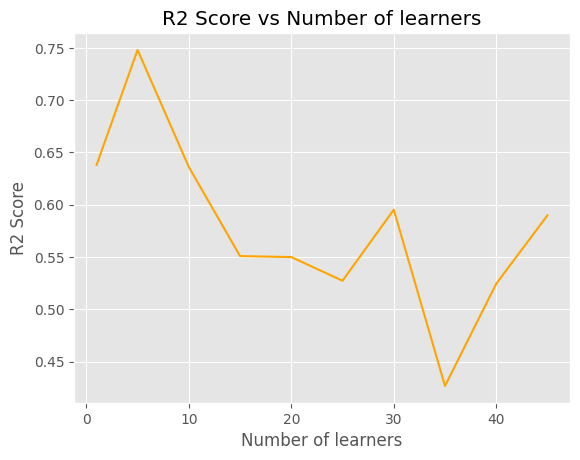

In [50]:
#Plot r2  vs number of learners
plt.plot(num_estimators, r2_scr, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of learners')
plt.show()

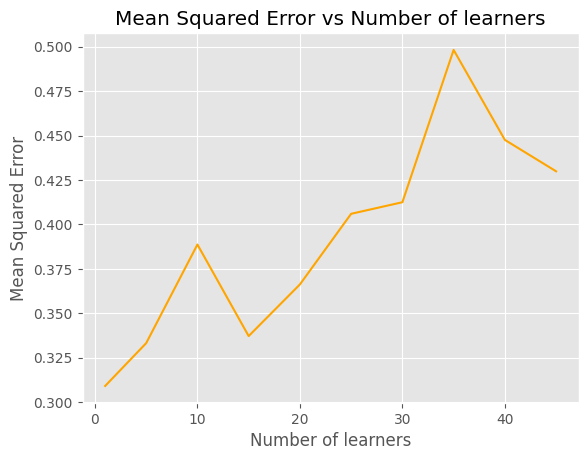

In [45]:
#plot the MSE
plt.plot(num_estimators, mse, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of learners')
plt.show()

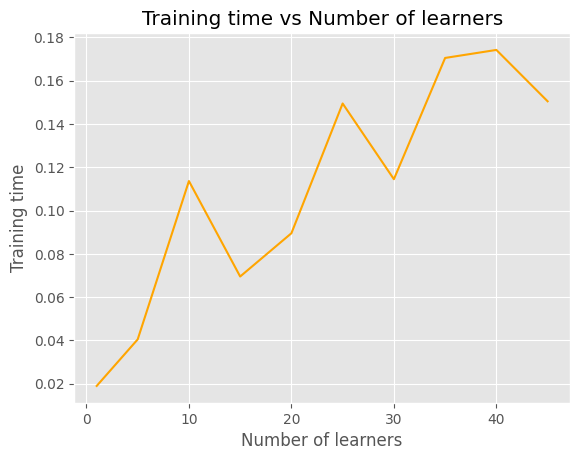

In [39]:
#Plot the training time
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Training time')
plt.title('Training time vs Number of learners')
plt.show()


## **Gradient Boosting**

In [140]:
class GradientBoostReg:
    def __init__(self, num_learners):
        self.num_learners = num_learners
        self.learners = []
        self.residuals = [] 
        self.lr = 1e-1

    def  fit(self, X, y):
        self.X = X
        self.y = y

        for i in range(self.num_learners):
            mean = np.mean(self.y)
            if i == 0:
                mean = np.mean(self.y)
                residual = self.y - mean
                self.residuals = residual

            else:
                model = DecisionTreeReg()
                model.fit(self.X, self.residuals, self.X, self.residuals, epochs=100)
                pred = model.predict(self.X)
                # pred = mean + pred 
                self.residuals = self.residuals -  (self.lr * pred)
                self.learners.append(model)

            # print(np.mean(self.residuals))
                

    def predict(self, X_test):
        mean = np.mean(self.y)
        pred = mean

        for model in self.learners:
            # print(pred)
            pred += (self.lr * model.predict(X_test))
            
        return pred

In [129]:
gradientBoost = GradientBoostReg(10)
gradientBoost.fit(X_train_reg, y_train_reg)
y_pred = gradientBoost.predict(X_test_reg)

In [130]:
r2_score(y_test_reg, y_pred), mean_squared_error(y_test_reg, y_pred)

(0.6735832575411015, 23.93737461137985)

In [142]:
gradientBoost = GradientBoostReg(20)
gradientBoost.fit(X_train_reg, y_train_reg)
y_pred = gradientBoost.predict(X_test_reg)
r2_score(y_test_reg, y_pred), mean_squared_error(y_test_reg, y_pred)

(0.7296568063220484, 19.825289144048092)

In [146]:
#Get mse, r2 score and training time for different number of learners
num_estimators = [ 5, 10, 15, 20, 25, 30, 35, 40, 45]
mse = []
r2_scr = []
training_time = []

for num in num_estimators:
    # print(num)
    gradientBoost = GradientBoostReg(num)
    start = time.time()
    gradientBoost.fit(X_train_reg, y_train_reg)
    end = time.time()
    y_pred = gradientBoost.predict(X_test_reg)
    # print("y pred shape", y_pred.shape)
    r2 = r2_score(y_test_reg, y_pred)
    mse.append(mean_squared_error(y_test_reg, y_pred))
    r2_scr.append(r2)
    training_time.append(end-start)

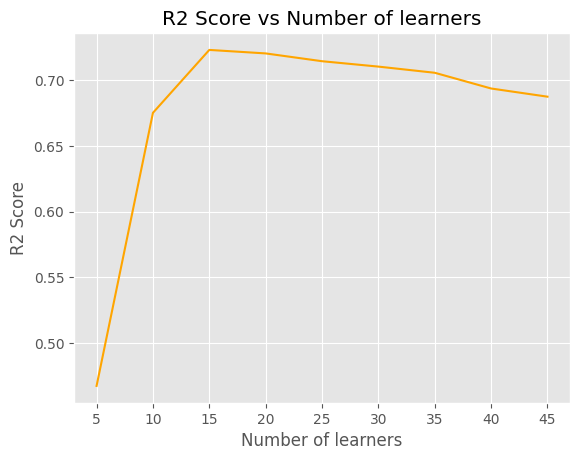

In [147]:
#plot r2 score vs number of learners
plt.plot(num_estimators, r2_scr, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of learners')
plt.show()

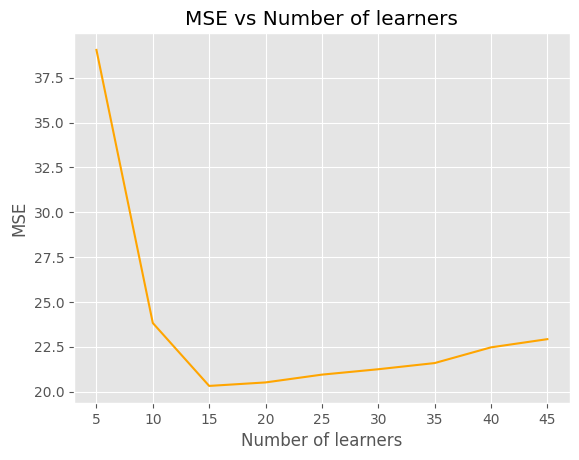

In [148]:
#plot mse vs number of learners
plt.plot(num_estimators, mse, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('MSE')
plt.title('MSE vs Number of learners')
plt.show()

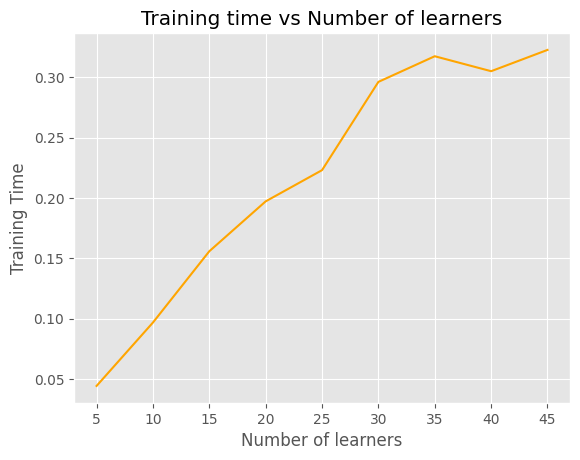

In [149]:
#plot r2 score vs number of learners
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Training Time')
plt.title('Training time vs Number of learners')
plt.show()

In [304]:
class GradientBoostClassification:
    def __init__(self, num_learners):
        self.num_learners = num_learners
        self.learners = []
        self.residuals = [] 
        self.lr = 1e-1
        self.probabilities = []

    def fit(self, X, y):
        self.X = X
        self.y = y

        len_y = len(y)
        y_ = np.argmax(y, axis = 1)
        present = np.sum(np.array(y_) == 1)
        absent = np.sum(np.array(y_) == 0)
        log_odds = np.log(present/absent)
        log_odds_array = [log_odds] * len_y
        # print("Log odds:", log_odds_array)

        for i in range(self.num_learners):
            if i == 0:
                pred_probab = 1/(1 + np.exp(-1 * log_odds))

                probabs = [pred_probab] * len_y
                self.residuals = np.argmax(self.y, axis = 1) - probabs
                self.probabilities = probabs
            else:
                dt = DecisionTreeReg(criterion='squared_error', max_depth=3)
                dt.fit(self.X, self.residuals, self.X, self.residuals, epochs=100)
                self.learners.append(dt)
                pred = dt.predict(self.X)
                # print("X shape:", self.X.shape)
                # print("pred shape:", pred.shape)
                leaf_node_indices = dt.get_node_indices(self.X)
                # print("Leaf node indices:", leaf_node_indices)
                # print("leaf node indices shape:", leaf_node_indices.shape)
                #Getting log odds for each leaf node
                # print(np.unique(leaf_node_indices))
                new_log_odds = [0] * len(self.y)
                for num in np.unique(leaf_node_indices):
                    # print("Num:", num)
                    # print("y shape", self.y.shape)
                    y_single = np.argmax(y, axis = 1)
                    # print("y single :", y_single)
                    idx = np.where(np.array(leaf_node_indices) == num)[0]
                    # print("idx:", idx)
                    alpha = np.sum(np.array(self.residuals)[idx]) / np.sum(np.array(self.probabilities)[idx] * (1 - np.array(self.probabilities)[idx]))
                    # print("Alpha:", alpha)
                    new_log_odds = [alpha if i in idx else val for i, val in enumerate(new_log_odds)]
                    # print("New log odds updated:", new_log_odds)
                # print("New log odds:", new_log_odds)
                log_odds_array +=  np.array(new_log_odds)
                # print("Log odds:", log_odds_array)
                probabs_new = 1/(1 + np.exp(-1 * log_odds_array))
                # print("Probabs:", probabs_new)
                self.residuals = np.argmax(self.y, axis = 1) - probabs_new
                print("Residuals:", np.mean(self.residuals))
        


    def predict(self, X_test):
        pred = []
        for model in self.learners:
            pred.append(model.predict(X_test))
        
        pred = np.array(pred)
        pred = np.sum(pred, axis=0)
        pred = 1/(1 + np.exp(-1 * pred))
        pred = np.where(pred > 0.5, 1, 0)
        return pred


In [318]:
gbc = GradientBoostClassification(10)
gbc.fit(X_train_rf, y_train_rf)

Residuals: 0.006472128375087496
Residuals: 0.004010287782453702
Residuals: -0.0005072914251422036
Residuals: 0.0037110656322363695
Residuals: 0.0018851078975207413
Residuals: -0.0011988387582276697
Residuals: 0.0007274461265345964
Residuals: -0.0007347470539566871
Residuals: -0.0003161616860756936


In [319]:
y_pred = gbc.predict(X_test_rf)

In [320]:
y_ex.shape

(8, 2)

In [322]:
accuracy_score(np.argmax(y_test_rf, axis = 1),y_pred)

0.7336244541484717

In [ ]:
#Get accuracy and training time for different number of learners
num_estimators = [ 5, 10, 15, 20, 25, 30, 35, 40, 45]
accuracy = []
training_time = []

for num in num_estimators:
    gbc = GradientBoostClassification(num)
    start = time.time()
    gbc.fit(X_train_rf, y_train_rf)
    end = time.time()
    y_pred = gbc.predict(X_test_rf)
    acc = accuracy_score(np.argmax(y_test_rf, axis = 1),y_pred)
    accuracy.append(acc)
    training_time.append(end-start)

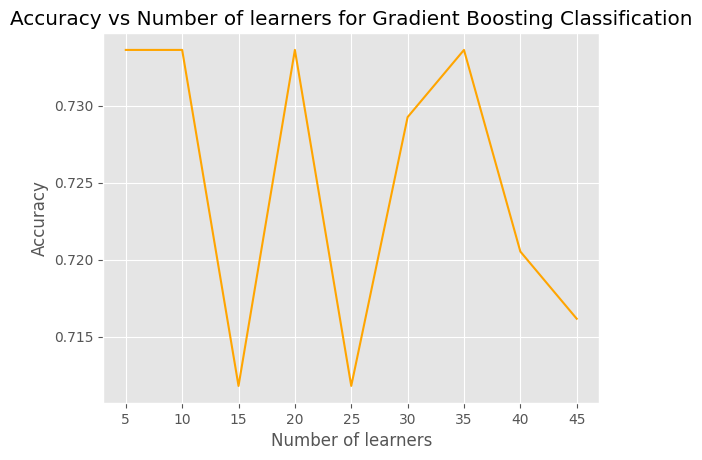

In [324]:
#plot accuracy vs number of learners
plt.plot(num_estimators, accuracy, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of learners for Gradient Boosting Classification')
plt.show()


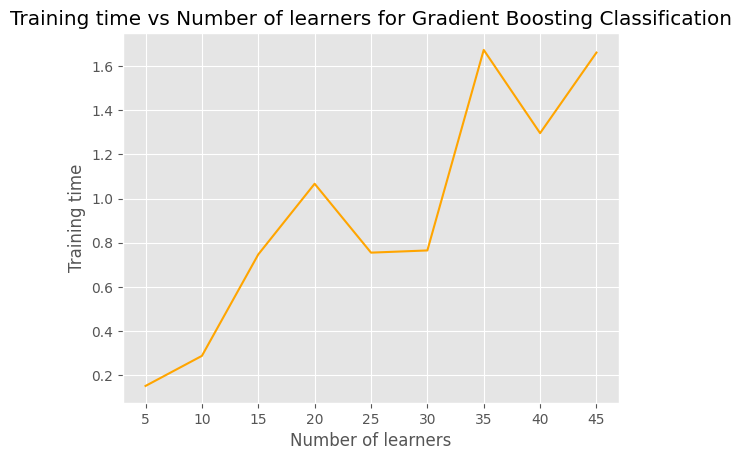

In [325]:
#plot training time vs number of learners
plt.plot(num_estimators, training_time, color='orange')
plt.xlabel('Number of learners')
plt.ylabel('Training time')
plt.title('Training time vs Number of learners for Gradient Boosting Classification')
plt.show()

### **Analysis**

Best accuracies for Classification:
 - Random Forest: 0.73
 - Ada boost: 0.75
 - Gradient boosting: 0.735

We observe that performance of all the models are comparable. The performance remains steady with a slight variation even when we vary the number of learners. 

Random Forest:<br>
Common mistakes might occur in regions where individual trees fail to capture complex relationships or outliers.
The random features chosen for the training of different models differ each time and can cause the fluctuations in the model performance.

AdaBoost:<br>
AdaBoost takes the weak learners and then tries to improve the performance of the model
Mistakes may occur when the weak learners are overly sensitive noise in the data.

Gradient Boosting:<br>
Gradient boosting is done by improving the learners by giving it the mistakes of previous learners and then improving them.
This is done sequentially and hence the residuals decrease as we add more learners
Common mistakes might be seen in regions where the model struggles to fit the residuals effectively.
